# Importing the libraries required for webscraping 

In [3]:
import requests
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup

In [24]:
#for i in range(1, 25):  
 #   URL= f'https://www.magicbricks.com/flats-in-pune-for-sale-pppfs/page-{i}'

In [25]:
#print(i)

In [26]:
url = "https://www.magicbricks.com/flats-in-pune-for-sale-pppfs"

In [27]:
headers = {'User-Agent': 'Mozilla/5.0'}

In [28]:
page = requests.get(url, headers=headers)

In [29]:
page

<Response [200]>

'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>\nFlats for Sale in Pune: 52205+ Apartments / Flats in Pune\n</title>\n<link href="https://fonts.gstatic.com" rel="dns-prefetch">\n<link rel="preconnect" href="https://cdn.staticmb.com">\n<link rel="preconnect" href="https://img.staticmb.com">\n<link href="https://www.googletagmanager.com" rel="dns-prefetch">\n<link href="https://www.google-analytics.com" rel="dns-prefetch">\n<link rel="shortcut icon" href="https://cdn.staticmb.com/images/favicon.ico">\n<meta name="description" content="Find over 52205+ Flats in Pune for Sale at MagicBricks. Choose from 2168+ New Projects, 48598+ Resale Flats, 50210+ Ready To Move Flats, with the option of 1/2/3/4 BHK apartments in Pune. ">\n<link rel="preload" as="image" href="https://img.staticmb.com/mbphoto/property/cropped_images/2024/Sep/06
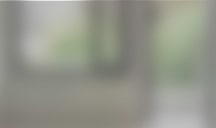
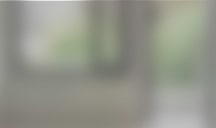

In [30]:
page.text


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
Flats for Sale in Pune: 52205+ Apartments / Flats in Pune
</title>
<link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com" rel="preconnect"/>
<link href="https://img.staticmb.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
<meta content="Find over 52205+ Flats in Pune for Sale at MagicBricks. Choose from 2168+ New Projects, 48598+ Resale Flats, 50210+ Ready To Move Flats, with the option of 1/2/3/4 BHK apartments in Pune. " name="description"/>
<link as="image" fetchpriority="high" href="https://img.staticmb.com/mbphoto/property/cropped_images/2024/Sep/06
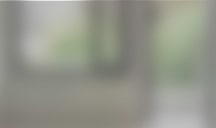
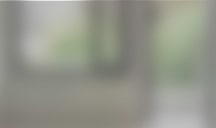

In [31]:
soup = BeautifulSoup(page.text, 'html.parser')
soup

In [34]:
'''listings=[]
for i in soup.find_all('div',class_='mb-srp__list'):
    listings.append(i.text)
    
listings'''

"listings=[]\nfor i in soup.find_all('div',class_='mb-srp__list'):\n    listings.append(i.text)\n    \nlistings"

In [35]:
# Find all property listings
listings = soup.find_all('div', class_='mb-srp__list')
print(f"Number of listings found: {len(listings)}")

Number of listings found: 30


In [36]:
for i in soup.find_all('div',class_= 'mb-srp__list'):
    print(i.text)
    print('--------'*30)

19+ PhotosUpdated todayOwner: Pankaj PankajPremium Member4 BHK Flat for Sale in Wakad, PunePride Purple Park TitaniumCarpet Area2200 sqftStatusReady to MoveFloor12 out of 12TransactionResaleFurnishingFurnishedfacingNorthoverlookingGarden/Park, Pool, Main RoadSocietyPride Purple Park TitaniumOwnershipFreeholdCar Parking1 CoveredBathroom4Balcony24 BHK flat is offered for sale in Wakad, Pune. The flat has a prime location within Pride Purple Park Titanium. You can buy this ready to move flat in Wakad at price of INR 5 Cr. Available in furnished state, this apartment is a great buy. Some neighbouring landmarks are near wisdom school.₹5 Cr ₹18587 per sqft Contact Owner Get Phone No. 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
20+ PhotosUpdated todayOwner: Sudhir chavanPremium Member5 BHK Flat for

In [36]:
# Initialize a list to store prices
prices = []

# Loop through each listing and extract the price
for listing in listings:
    price_tag = listing.find('div', class_='mb-srp__card__price--amount')
    if price_tag:
        prices.append(price_tag.text.strip())
    else:
        prices.append(None)  # Handle cases where price is missing

# Print the extracted prices
print("Extracted Prices:")
for price in prices:
    print(price)

# Optional: Store data in a DataFrame
data = {'Price': prices}
df = pd.DataFrame(data)
print("\nDataFrame with Prices:")
print(df)

Extracted Prices:
₹56.5 Lac
₹1.07 Cr
₹10 Cr
₹52 Lac
₹70 Lac
₹22.8 Lac
₹20 Lac
₹21 Lac
₹55 Lac
₹45 Lac
₹75 Lac
₹1.35 Cr
₹1.15 Cr
₹44 Lac
₹60 Lac
₹46 Lac
₹72 Lac
₹36 Lac
₹3.51 Cr
₹24 Lac
₹1.80 Cr
₹76 Lac
₹1.35 Cr
₹31 Lac
₹21 Lac
₹1.06 Cr
₹1.05 Cr
₹4.30 Cr
₹79 Lac
₹71 Lac

DataFrame with Prices:
        Price
0   ₹56.5 Lac
1    ₹1.07 Cr
2      ₹10 Cr
3     ₹52 Lac
4     ₹70 Lac
5   ₹22.8 Lac
6     ₹20 Lac
7     ₹21 Lac
8     ₹55 Lac
9     ₹45 Lac
10    ₹75 Lac
11   ₹1.35 Cr
12   ₹1.15 Cr
13    ₹44 Lac
14    ₹60 Lac
15    ₹46 Lac
16    ₹72 Lac
17    ₹36 Lac
18   ₹3.51 Cr
19    ₹24 Lac
20   ₹1.80 Cr
21    ₹76 Lac
22   ₹1.35 Cr
23    ₹31 Lac
24    ₹21 Lac
25   ₹1.06 Cr
26   ₹1.05 Cr
27   ₹4.30 Cr
28    ₹79 Lac
29    ₹71 Lac


In [63]:
flat_type = []
locality = []
city = []
project_name = []
carpet_area = []
present_status = []
floor_number = []
total_floors = []
furnishing = []
no_of_bathrooms = []
price = []
price_per_sqft = []
headers = {'User-Agent': 'Mozilla/5.0'}
for i in range(1,51):
    url = f'https://www.magicbricks.com/flats-in-pune-for-sale-pppfs/page-{i}'
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    listings = soup.find_all('div', class_='mb-srp__list')

    for i in listings:
        t=i.find('h2',class_="mb-srp__card--title")
        text = t.text
        flt_type = re.findall('\d.BHK|Apartment',text)
        if flt_type:
            flat_type.append(flt_type[0])
        else:
            flat_type.append(np.nan)
        area = re.findall('in (.*)',text)
        if area:
            locality.append(area[0])
        else:
            locality.append(np.nan)
        cty = re.findall('Pune',text)
        if cty:
            city.append(cty[0])
        else:
            city.append(np.nan)
        sct_type = i.find('div',class_ = 'mb-srp__card__society')
        if sct_type:
            project_name.append(sct_type.text)
        else:
            project_name.append(np.nan)
        crpt_area = i.find('div',class_ = 'mb-srp__card__summary--value')
        if crpt_area:
            carpet_area.append(crpt_area.text)
        else:
            carpet_area.append(np.nan)
        desc = i.find('div',class_="mb-srp__card__summary__list")
        descriptions = desc.text.strip() if desc else ''
        prt_status = re.findall('Status\w+ \w+.\w+',descriptions)
        if prt_status:
            present_status.append(prt_status[0])
        else:
            present_status.append(np.nan)
        flr_no = re.findall('Floor\d+',descriptions)
        if flr_no:
            floor_number.append(flr_no[0])
        else:
            floor_number.append(np.nan)
        tl_floor = re.findall('out of \d+',descriptions)
        if tl_floor:
            total_floors.append(tl_floor[0])
        else:
            total_floors.append(np.nan)
        fur_type = re.findall('Furnishing\w+',descriptions)
        if fur_type:
            furnishing.append(fur_type[0])
        else:
            furnishing.append(np.nan) 
        bathroom = re.findall('Bathroom\d',descriptions)
        if bathroom:
            no_of_bathrooms.append(bathroom[0])
        else:
            no_of_bathrooms.append(np.nan)
        prc = i.find('div',class_='mb-srp__card__price--amount')
        if prc:
            price.append(prc.text)
        else:
            price.append(np.nan)
        size_prc = i.find('div',class_='mb-srp__card__price--size')
        if size_prc:
            price_per_sqft.append(size_prc.text)
        else:
            price_per_sqft.append(np.nan)
data = {
    'Flat_type':flat_type,
    'Locality':locality,
    'City':city,
    'Project_name':project_name,
    'Carpet_area':carpet_area,
    'Present_status':present_status,
    'Floor_number':floor_number,
    'Total_floors':total_floors,
    'Furnishing':furnishing,
    'No_of_bathrooms':no_of_bathrooms,
    'Price':price,
    'Price_per_sqft':price_per_sqft
}
data1 = pd.DataFrame(data)

In [37]:
listings = soup.find_all('div', class_='mb-srp__list')

for i in listings:
    print(i.find('h2',class_="mb-srp__card--title").text)
    

4 BHK Flat for Sale in Wakad, Pune
5 BHK Flat for Sale in Hinjawadi, Pune
2 BHK Flat for Sale in Katraj Kondhwa Road, Pune
2 BHK Flat for Sale in Padmavati Nagar, Pune
3 BHK Flat for Sale in Manjari Khurd, Pune
3 BHK Flat for Sale in Wakad, Pune
2 BHK Flat for Sale in Chakan, Pune
1 BHK Flat for Sale in Raikar Mala Road, Pune
1 BHK Flat for Sale in Handewadi Road, Pune
2 BHK Flat for Sale in Punawale, Pimpri Chinchwad, Pune
2 BHK Flat for Sale in Dhanori, Pune
 Apartment for Sale in Kalewadi Pimpri Chinchwad, Pune
3 BHK Flat for Sale in Shankar Kalat Nagar, Pune
3 BHK Flat for Sale in Pimple Saudagar, Pimpri Chinchwad, Pune
4 BHK Flat for Sale in Magarpatta, Pune
2 BHK Flat for Sale in Magarpatta, Pune
2 BHK Flat for Sale in Magarpatta, Pune
2 BHK Flat for Sale in Magarpatta, Pune
2 BHK Flat for Sale in Baner, Pune
2 BHK Flat for Sale in Kharadi, Pune
3 BHK Flat for Sale in NIBM Road, Pune
2 BHK Flat for Sale in Nyati County, Mohammed Wadi, Pune
3 BHK Flat for Sale in Aundh, Pune
3 BHK

In [49]:
for i in listings:
    print(i.find('div',class_="mb-srp__card__summary__list").text)

Carpet Area2200 sqftStatusReady to MoveFloor12 out of 12TransactionResaleFurnishingFurnishedfacingNorthoverlookingGarden/Park, Pool, Main RoadSocietyPride Purple Park TitaniumOwnershipFreeholdCar Parking1 CoveredBathroom4Balcony2
Carpet Area2450 sqftStatusReady to MoveFloor15 out of 25TransactionResaleFurnishingSemi-FurnishedfacingEastoverlookingGarden/Park, Pool, Main RoadSocietyParanjape Blue RidgeOwnershipFreeholdCar Parking4 CoveredBathroom5Balcony2
Carpet Area788 sqftStatusReady to MoveFloor9 out of 11TransactionResaleFurnishingUnfurnishedfacingEastoverlookingMain RoadSocietyHubtown CountrywoodsOwnershipFreeholdBathroom2Balcony3
Carpet Area735 sqftStatusReady to MoveFloor3 out of 9TransactionResaleFurnishingUnfurnishedfacingWestSocietySVS EmpressiaBathroom2Balcony1
Super Area850 sqftUnder ConstructionPoss. by Dec '25Floor18 out of 27TransactionResaleFurnishingUnfurnishedfacingEastoverlookingGarden/Park, Pool, Main RoadSocietyGodrej SkygreensOwnershipFreeholdBathroom3Balcony2
Carpe

In [13]:
for i in listings:
    print(i.find('div',class_="mb-srp__card__summary__list--item").text)

[]

In [60]:
present_status

['2200 sqft',
 'StatusReady to MoveFloor12',
 '2450 sqft',
 'StatusReady to MoveFloor15',
 '788 sqft',
 'StatusReady to MoveFloor9',
 '735 sqft',
 'StatusReady to MoveFloor3',
 '850 sqft',
 nan,
 '850 sqft',
 'StatusReady to MoveFloor9',
 '746 sqft',
 'StatusReady to MoveFloor5',
 '480 sqft',
 'StatusReady to MoveFloor3',
 '459 sqft',
 'StatusReady to MoveFloor13',
 '1096 sqft',
 'StatusReady to MoveFloor4',
 '770 sqft',
 'StatusReady to MoveFloor5',
 '824 sqft',
 nan,
 '1400 sqft',
 'StatusReady to MoveFloor10',
 '1115 sqft',
 'StatusReady to MoveFloor2',
 '1563 sqft',
 'StatusReady to MoveFloor5',
 '720 sqft',
 'StatusReady to MoveFloor4',
 '756 sqft',
 'StatusReady to MoveFloor3',
 '774 sqft',
 'StatusReady to MoveFloor4',
 '842 sqft',
 'StatusReady to MoveFloor3',
 '1080 sqft',
 'StatusReady to MoveFloor7',
 '1152 sqft',
 'StatusReady to MoveFloor4',
 '756 sqft',
 'StatusReady to MoveFloor5',
 '864 sqft',
 'StatusReady to MoveFloor2',
 '900 sqft',
 'StatusReady to MoveFloor7',
 '72

In [64]:
data1

Flat_type                         Locality  City  \
0        4 BHK                      Wakad, Pune  Pune   
1        5 BHK                  Hinjawadi, Pune  Pune   
2        2 BHK        Katraj Kondhwa Road, Pune  Pune   
3        2 BHK            Padmavati Nagar, Pune  Pune   
4        3 BHK              Manjari Khurd, Pune  Pune   
...        ...                              ...   ...   
1495     1 BHK                Somwar Peth, Pune  Pune   
1496     1 BHK  Chikhali Pimpri Chinchwad, Pune  Pune   
1497     3 BHK                  Hinjawadi, Pune  Pune   
1498     3 BHK                  Hinjawadi, Pune  Pune   
1499     2 BHK                    Bopkhel, Pune  Pune   

                    Project_name Carpet_area              Present_status  \
0     Pride Purple Park Titanium   2200 sqft  StatusReady to MoveFloor12   
1           Paranjape Blue Ridge   2450 sqft  StatusReady to MoveFloor15   
2           Hubtown Countrywoods    788 sqft   StatusReady to MoveFloor9   
3                  SVS Empressia    735 sqft   StatusReady to MoveFloor3   
4               Godrej Skygreens    850 sqft                         NaN   
...                          ...         ...                         ...   
1495                         NaN    400 sqft   StatusReady to MoveFloor1   
1496           Aishwaryam Hamara    530 sqft  StatusReady to MoveFloor11   
1497             Xrbia Hinjewadi    798 sqft   StatusReady to MoveFloor4   
1498   Kolte Patil Life Republic    821 sqft                         NaN   
1499                         NaN    586 sqft   StatusReady to MoveFloor1   

     Floor_number Total_floors  \
0         Floor12    out of 12   
1         Floor15    out of 25   
2          Floor9    out of 11   
3          Floor3     out of 9   
4         Floor18    out of 27   
...           ...          ...   
1495       Floor1     out of 3   
1496      Floor11    out of 12   
1497       Floor4     out of 7   
1498          NaN          NaN   
1499       Floor1     out of 3   

                                            Furnishing No_of_bathrooms  \
0      FurnishingFurnishedfacingNorthoverlookingGarden       Bathroom4   
1                                       FurnishingSemi       Bathroom5   
2       FurnishingUnfurnishedfacingEastoverlookingMain       Bathroom2   
3            FurnishingUnfurnishedfacingWestSocietySVS       Bathroom2   
4     FurnishingUnfurnishedfacingEastoverlookingGarden       Bathroom3   
...                                                ...             ...   
1495                                    FurnishingSemi       Bathroom1   
1496  FurnishingUnfurnishedfacingEastoverlookingGarden       Bathroom1   
1497                                    FurnishingSemi       Bathroom2   
1498                 FurnishingUnfurnishedSocietyKolte       Bathroom3   
1499                                    FurnishingSemi       Bathroom1   

           Price    Price_per_sqft  
0         ₹5 Cr   ₹18587 per sqft   
1      ₹3.50 Cr   ₹11111 per sqft   
2       ₹75 Lac    ₹7324 per sqft   
3      ₹1.05 Cr   ₹10000 per sqft   
4         ₹1 Cr   ₹11765 per sqft   
...          ...               ...  
1495    ₹37 Lac    ₹9250 per sqft   
1496    ₹26 Lac    ₹4906 per sqft   
1497  ₹39.5 Lac    ₹4950 per sqft   
1498  ₹77.2 Lac                NaN  
1499    ₹20 Lac    ₹3413 per sqft   

[1500 rows x 12 columns]

In [65]:
data1.isnull().sum()

Flat_type            0
Locality             0
City                 0
Project_name       328
Carpet_area          1
Present_status     773
Floor_number       632
Total_floors       614
Furnishing          10
No_of_bathrooms     11
Price                0
Price_per_sqft     453
dtype: int64

# now export the extracted file in the csv format 

In [66]:
data1.to_csv('Pune flat prices.csv')

# Read the exported csv file 

In [238]:
flat_data = pd.read_csv('Pune flat prices.csv')
flat_data.head()

Unnamed: 0 Flat_type                   Locality  City  \
0           0     4 BHK                Wakad, Pune  Pune   
1           1     5 BHK            Hinjawadi, Pune  Pune   
2           2     2 BHK  Katraj Kondhwa Road, Pune  Pune   
3           3     2 BHK      Padmavati Nagar, Pune  Pune   
4           4     3 BHK        Manjari Khurd, Pune  Pune   

                 Project_name Carpet_area              Present_status  \
0  Pride Purple Park Titanium   2200 sqft  StatusReady to MoveFloor12   
1        Paranjape Blue Ridge   2450 sqft  StatusReady to MoveFloor15   
2        Hubtown Countrywoods    788 sqft   StatusReady to MoveFloor9   
3               SVS Empressia    735 sqft   StatusReady to MoveFloor3   
4            Godrej Skygreens    850 sqft                         NaN   

  Floor_number Total_floors                                        Furnishing  \
0      Floor12    out of 12   FurnishingFurnishedfacingNorthoverlookingGarden   
1      Floor15    out of 25                                    FurnishingSemi   
2       Floor9    out of 11    FurnishingUnfurnishedfacingEastoverlookingMain   
3       Floor3     out of 9         FurnishingUnfurnishedfacingWestSocietySVS   
4      Floor18    out of 27  FurnishingUnfurnishedfacingEastoverlookingGarden   

  No_of_bathrooms      Price    Price_per_sqft  
0       Bathroom4     ₹5 Cr   ₹18587 per sqft   
1       Bathroom5  ₹3.50 Cr   ₹11111 per sqft   
2       Bathroom2   ₹75 Lac    ₹7324 per sqft   
3       Bathroom2  ₹1.05 Cr   ₹10000 per sqft   
4       Bathroom3     ₹1 Cr   ₹11765 per sqft

In [177]:
flat_data.apply(pd.Series.unique)

Unnamed: 0         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Flat_type          [4 BHK, 5 BHK, 2 BHK, 3 BHK, 1 BHK, Apartment,...
Locality           [Wakad, Pune, Hinjawadi, Pune, Katraj Kondhwa ...
City                                                          [Pune]
Project_name       [Pride Purple Park Titanium, Paranjape Blue Ri...
Carpet_area        [2200 sqft, 2450 sqft, 788 sqft, 735 sqft, 850...
Present_status     [StatusReady to MoveFloor12, StatusReady to Mo...
Floor_number       [Floor12, Floor15, Floor9, Floor3, Floor18, Fl...
Total_floors       [out of 12, out of 25, out of 11, out of 9, ou...
Furnishing         [FurnishingFurnishedfacingNorthoverlookingGard...
No_of_bathrooms    [Bathroom4, Bathroom5, Bathroom2, Bathroom3, B...
Price              [₹5 Cr , ₹3.50 Cr , ₹75 Lac , ₹1.05 Cr , ₹1 Cr...
Price_per_sqft     [₹18587 per sqft , ₹11111 per sqft , ₹7324 per...
dtype: object

In [239]:
flat_data.isnull().sum()

Unnamed: 0           0
Flat_type            0
Locality             0
City                 0
Project_name       328
Carpet_area          1
Present_status     773
Floor_number       632
Total_floors       614
Furnishing          10
No_of_bathrooms     11
Price                0
Price_per_sqft     453
dtype: int64

In [240]:
flat_data['Project_name'].nunique()

583

In [180]:
flat_data

Unnamed: 0 Flat_type                         Locality  City  \
0              0     4 BHK                      Wakad, Pune  Pune   
1              1     5 BHK                  Hinjawadi, Pune  Pune   
2              2     2 BHK        Katraj Kondhwa Road, Pune  Pune   
3              3     2 BHK            Padmavati Nagar, Pune  Pune   
4              4     3 BHK              Manjari Khurd, Pune  Pune   
...          ...       ...                              ...   ...   
1495        1495     1 BHK                Somwar Peth, Pune  Pune   
1496        1496     1 BHK  Chikhali Pimpri Chinchwad, Pune  Pune   
1497        1497     3 BHK                  Hinjawadi, Pune  Pune   
1498        1498     3 BHK                  Hinjawadi, Pune  Pune   
1499        1499     2 BHK                    Bopkhel, Pune  Pune   

                    Project_name Carpet_area              Present_status  \
0     Pride Purple Park Titanium   2200 sqft  StatusReady to MoveFloor12   
1           Paranjape Blue Ridge   2450 sqft  StatusReady to MoveFloor15   
2           Hubtown Countrywoods    788 sqft   StatusReady to MoveFloor9   
3                  SVS Empressia    735 sqft   StatusReady to MoveFloor3   
4               Godrej Skygreens    850 sqft                         NaN   
...                          ...         ...                         ...   
1495                         NaN    400 sqft   StatusReady to MoveFloor1   
1496           Aishwaryam Hamara    530 sqft  StatusReady to MoveFloor11   
1497             Xrbia Hinjewadi    798 sqft   StatusReady to MoveFloor4   
1498   Kolte Patil Life Republic    821 sqft                         NaN   
1499                         NaN    586 sqft   StatusReady to MoveFloor1   

     Floor_number Total_floors  \
0         Floor12    out of 12   
1         Floor15    out of 25   
2          Floor9    out of 11   
3          Floor3     out of 9   
4         Floor18    out of 27   
...           ...          ...   
1495       Floor1     out of 3   
1496      Floor11    out of 12   
1497       Floor4     out of 7   
1498          NaN          NaN   
1499       Floor1     out of 3   

                                            Furnishing No_of_bathrooms  \
0      FurnishingFurnishedfacingNorthoverlookingGarden       Bathroom4   
1                                       FurnishingSemi       Bathroom5   
2       FurnishingUnfurnishedfacingEastoverlookingMain       Bathroom2   
3            FurnishingUnfurnishedfacingWestSocietySVS       Bathroom2   
4     FurnishingUnfurnishedfacingEastoverlookingGarden       Bathroom3   
...                                                ...             ...   
1495                                    FurnishingSemi       Bathroom1   
1496  FurnishingUnfurnishedfacingEastoverlookingGarden       Bathroom1   
1497                                    FurnishingSemi       Bathroom2   
1498                 FurnishingUnfurnishedSocietyKolte       Bathroom3   
1499                                    FurnishingSemi       Bathroom1   

           Price    Price_per_sqft  
0         ₹5 Cr   ₹18587 per sqft   
1      ₹3.50 Cr   ₹11111 per sqft   
2       ₹75 Lac    ₹7324 per sqft   
3      ₹1.05 Cr   ₹10000 per sqft   
4         ₹1 Cr   ₹11765 per sqft   
...          ...               ...  
1495    ₹37 Lac    ₹9250 per sqft   
1496    ₹26 Lac    ₹4906 per sqft   
1497  ₹39.5 Lac    ₹4950 per sqft   
1498  ₹77.2 Lac                NaN  
1499    ₹20 Lac    ₹3413 per sqft   

[1500 rows x 13 columns]

In [181]:
flat_data.dtypes

Unnamed: 0          int64
Flat_type          object
Locality           object
City               object
Project_name       object
Carpet_area        object
Present_status     object
Floor_number       object
Total_floors       object
Furnishing         object
No_of_bathrooms    object
Price              object
Price_per_sqft     object
dtype: object

# Making a function to convert all the values in price column to lacs 

In [241]:
def convert_price_to_lakhs(price):
    price = price.replace("₹", "").strip()  
    match = re.match(r"([\d\.]+)\s*(Cr|Lac)", price) 
    
    if match:
        value, unit = match.groups()
        value = float(value) 
        if unit == "Cr":
            return value * 100 
        elif unit == "Lac":
            return value  
    return None  

In [242]:
flat_data['Price'] = flat_data['Price'].apply(convert_price_to_lakhs)

# cleaning of the data and changing datatypes as required 

In [184]:
flat_data['Carpet_area'] = flat_data['Carpet_area'].str.extract('(\d+)').astype(float)

In [243]:
flat_data['Floor_number'] = flat_data['Floor_number'].str.replace('Floor','',regex=True)
flat_data['Total_floors'] = flat_data['Total_floors'].str.replace('out of','',regex=True)
flat_data['No_of_bathrooms'] = flat_data['No_of_bathrooms'].str.replace('Bathroom','',regex=True)
flat_data['Price_per_sqft'] = flat_data['Price_per_sqft'].replace('[^0-9.]', '', regex=True).astype(float)

In [244]:
flat_data.dtypes

Unnamed: 0           int64
Flat_type           object
Locality            object
City                object
Project_name        object
Carpet_area         object
Present_status      object
Floor_number        object
Total_floors        object
Furnishing          object
No_of_bathrooms     object
Price              float64
Price_per_sqft     float64
dtype: object

In [245]:
flat_data.head()

Unnamed: 0 Flat_type                   Locality  City  \
0           0     4 BHK                Wakad, Pune  Pune   
1           1     5 BHK            Hinjawadi, Pune  Pune   
2           2     2 BHK  Katraj Kondhwa Road, Pune  Pune   
3           3     2 BHK      Padmavati Nagar, Pune  Pune   
4           4     3 BHK        Manjari Khurd, Pune  Pune   

                 Project_name Carpet_area              Present_status  \
0  Pride Purple Park Titanium   2200 sqft  StatusReady to MoveFloor12   
1        Paranjape Blue Ridge   2450 sqft  StatusReady to MoveFloor15   
2        Hubtown Countrywoods    788 sqft   StatusReady to MoveFloor9   
3               SVS Empressia    735 sqft   StatusReady to MoveFloor3   
4            Godrej Skygreens    850 sqft                         NaN   

  Floor_number Total_floors                                        Furnishing  \
0           12           12   FurnishingFurnishedfacingNorthoverlookingGarden   
1           15           25                                    FurnishingSemi   
2            9           11    FurnishingUnfurnishedfacingEastoverlookingMain   
3            3            9         FurnishingUnfurnishedfacingWestSocietySVS   
4           18           27  FurnishingUnfurnishedfacingEastoverlookingGarden   

  No_of_bathrooms  Price  Price_per_sqft  
0               4  500.0         18587.0  
1               5  350.0         11111.0  
2               2   75.0          7324.0  
3               2  105.0         10000.0  
4               3  100.0         11765.0

# Observation : 
The dataset contains detailed information on Pune flat listings, including flat type, locality, project name, area, and price. Key numeric fields like carpet area and price per square foot enable comparison. Some columns like 'Present_status' and 'Furnishing' have inconsistent or combined values, and missing data is present. With minor cleaning, the dataset is ready for analysis and visualization

# Imputation of Null values 

In [246]:
flat_data['Present_status'] = flat_data['Present_status'].str.extract(r'(Ready to Move)' , expand=False)

In [247]:
flat_data['Furnishing'] = flat_data['Furnishing'].str.extract(r'(Furnished|Semi|Unfurnished)' , expand=False)

In [248]:
flat_data['Locality'] = flat_data['Locality'].str.replace('Pune','',regex=True)

In [249]:
flat_data['Locality'] = flat_data['Locality'].str.replace(',','',regex=True)

In [253]:
flat_data['Carpet_area'] = flat_data['Carpet_area'].str.replace('sqft','',regex=True)
flat_data['Carpet_area'] = flat_data['Carpet_area'].str.replace('Resale','',regex=True)
flat_data['Carpet_area'] = pd.to_numeric(flat_data['Carpet_area'], errors='coerce')
flat_data['Carpet_area'] = flat_data['Carpet_area'].round().astype('Int64')

In [254]:
most_common_flat_type = flat_data['Flat_type'].mode()[0]  
flat_data['Flat_type'].replace('Apartment', most_common_flat_type, inplace=True)  

In [255]:
flat_data.isnull().sum()

Unnamed: 0           0
Flat_type            0
Locality             0
City                 0
Project_name       328
Carpet_area         11
Present_status     773
Floor_number       632
Total_floors       614
Furnishing          10
No_of_bathrooms     11
Price               22
Price_per_sqft     453
dtype: int64

# filling of the null values 

In [262]:
flat_data['Project_name'] = flat_data['Project_name'].fillna('Unknown')

In [261]:
flat_data['Carpet_area'] = flat_data['Carpet_area'].fillna(flat_data['Carpet_area'].median())

In [260]:
flat_data['Present_status'] = flat_data['Present_status'].fillna('Under Construction')

In [256]:
flat_data['Floor_number'].fillna(flat_data['Floor_number'].mode()[0], inplace=True)
flat_data['Total_floors'].fillna(flat_data['Total_floors'].mode()[0], inplace=True)
flat_data['No_of_bathrooms'].fillna(flat_data['No_of_bathrooms'].mode()[0], inplace=True)
flat_data['Price'].fillna(flat_data['Price'].median(), inplace=True)
flat_data['Price_per_sqft'].fillna(flat_data['Price_per_sqft'].median(), inplace=True) 

In [257]:
flat_data['Furnishing'].fillna(flat_data['Furnishing'].mode()[0],inplace=True)

In [258]:
flat_data['Flat_type'] = flat_data['Flat_type'].str.replace('0 BHK','1 BHK',regex=True)

# now lets check all the null values are fill or not 

In [263]:
flat_data.isnull().sum()

Unnamed: 0         0
Flat_type          0
Locality           0
City               0
Project_name       0
Carpet_area        0
Present_status     0
Floor_number       0
Total_floors       0
Furnishing         0
No_of_bathrooms    0
Price              0
Price_per_sqft     0
dtype: int64

# Drop the unwanted columns 

In [264]:
flat_data.drop(columns=['Unnamed: 0'],inplace=True)

# Renaming the columnns 

In [265]:
flat_data.rename(columns=
                {'Carpet_area':'Carpet_area(in sqft)',
                 'Price':'Price(in Lakhs)',
                 'Price_per_sqft':'Price_per_sqft(in Rupees)'},inplace=True)

In [266]:
flat_data.head()

Flat_type              Locality  City                Project_name  \
0     4 BHK                Wakad   Pune  Pride Purple Park Titanium   
1     5 BHK            Hinjawadi   Pune        Paranjape Blue Ridge   
2     2 BHK  Katraj Kondhwa Road   Pune        Hubtown Countrywoods   
3     2 BHK      Padmavati Nagar   Pune               SVS Empressia   
4     3 BHK        Manjari Khurd   Pune            Godrej Skygreens   

   Carpet_area(in sqft)      Present_status Floor_number Total_floors  \
0                  2200       Ready to Move           12           12   
1                  2450       Ready to Move           15           25   
2                   788       Ready to Move            9           11   
3                   735       Ready to Move            3            9   
4                   850  Under Construction           18           27   

    Furnishing No_of_bathrooms  Price(in Lakhs)  Price_per_sqft(in Rupees)  
0    Furnished               4            500.0                    18587.0  
1         Semi               5            350.0                    11111.0  
2  Unfurnished               2             75.0                     7324.0  
3  Unfurnished               2            105.0                    10000.0  
4  Unfurnished               3            100.0                    11765.0

# Importing the libraries required for the visualization

In [267]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Separating the numerical and categorical columns 

In [268]:
flat_data.dtypes

Flat_type                     object
Locality                      object
City                          object
Project_name                  object
Carpet_area(in sqft)           Int64
Present_status                object
Floor_number                  object
Total_floors                  object
Furnishing                    object
No_of_bathrooms               object
Price(in Lakhs)              float64
Price_per_sqft(in Rupees)    float64
dtype: object

In [269]:
numerical_col = flat_data.select_dtypes(include=['float64','Int64']).columns.to_list()
categorical_col = flat_data.select_dtypes(include=['object']).columns.to_list()

# Univariate Analysis

In [270]:
from scipy import stats

In [271]:
def numerical(df,column):
    print(df[column].agg(['min','max','mean','median','std','skew']))
    ## now we will see the distribution yaha pe kayi sare plot banana hain isliye subplot use karenge 
    plt.figure(figsize=(15,10))
    ## histogram
    plt.subplot(2,2,1)
    df[column].plot(kind='hist',bins=10)
    plt.title("Histogram plot")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    ## kde
    plt.subplot(2,2,2)
    df[column].plot(kind='kde')
    plt.title("KDE plot")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    ## box plot
    plt.subplot(2,2,3)
    df[column].plot(kind='box')
    plt.title("Box plot")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    ## QQ plot   # isko scipy se import karenge 
    plt.subplot(2,2,4)
    stats.probplot(df[column],dist='norm',plot=plt)
    plt.title('QQ plot of numerical column')
    plt.show()

In [93]:
numerical_col

['Carpet_area(in sqft)',
 'Floor_number',
 'Total_floors',
 'No_of_bathrooms',
 'Price(in Lakhs)',
 'Price_per_sqft(in Rupees)']

min          8.400000
max       1450.000000
mean       128.170933
median      96.850000
std        126.382829
skew         4.682115
Name: Price(in Lakhs), dtype: float64


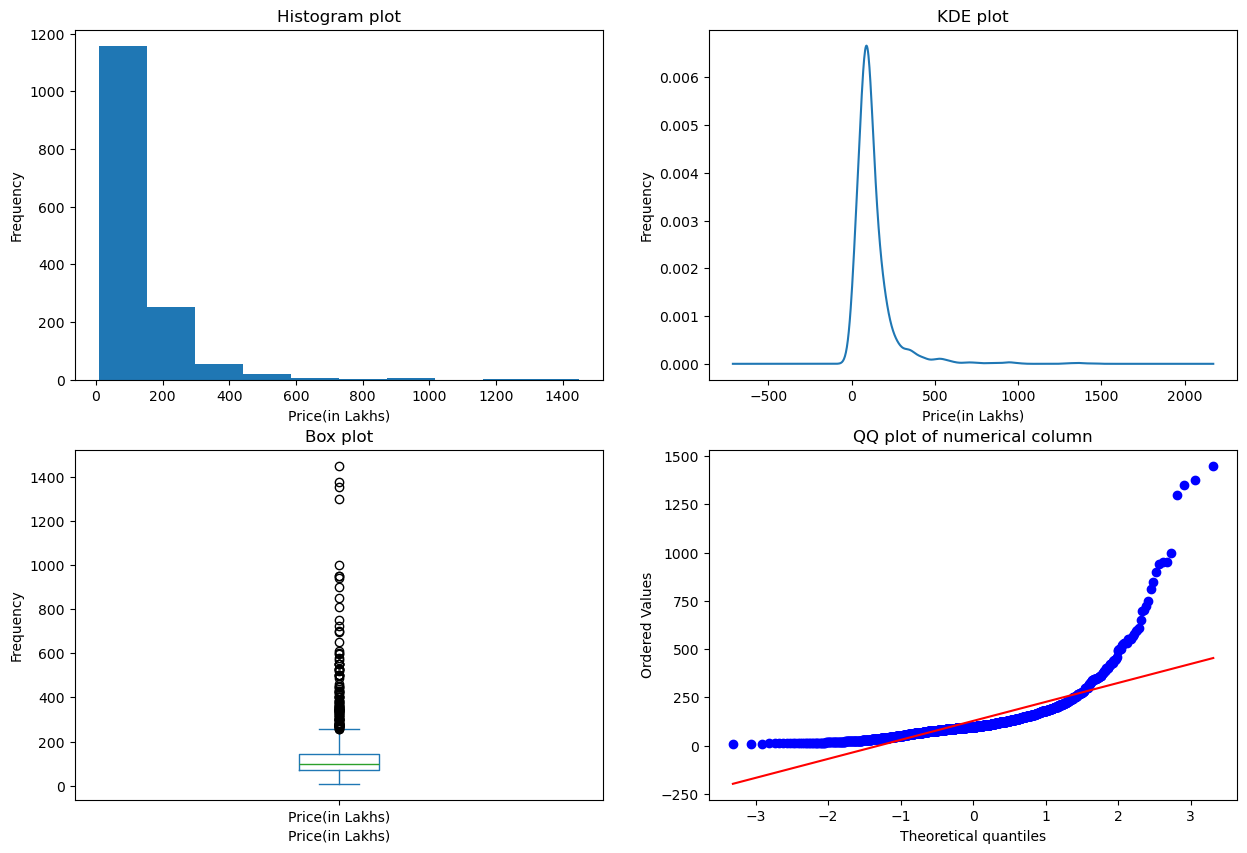

In [272]:
numerical(flat_data,'Price(in Lakhs)')

min        2500.000000
max       23265.000000
mean       8867.201528
median     8867.201528
std        3071.008824
skew          0.830670
Name: Price_per_sqft(in Rupees), dtype: float64


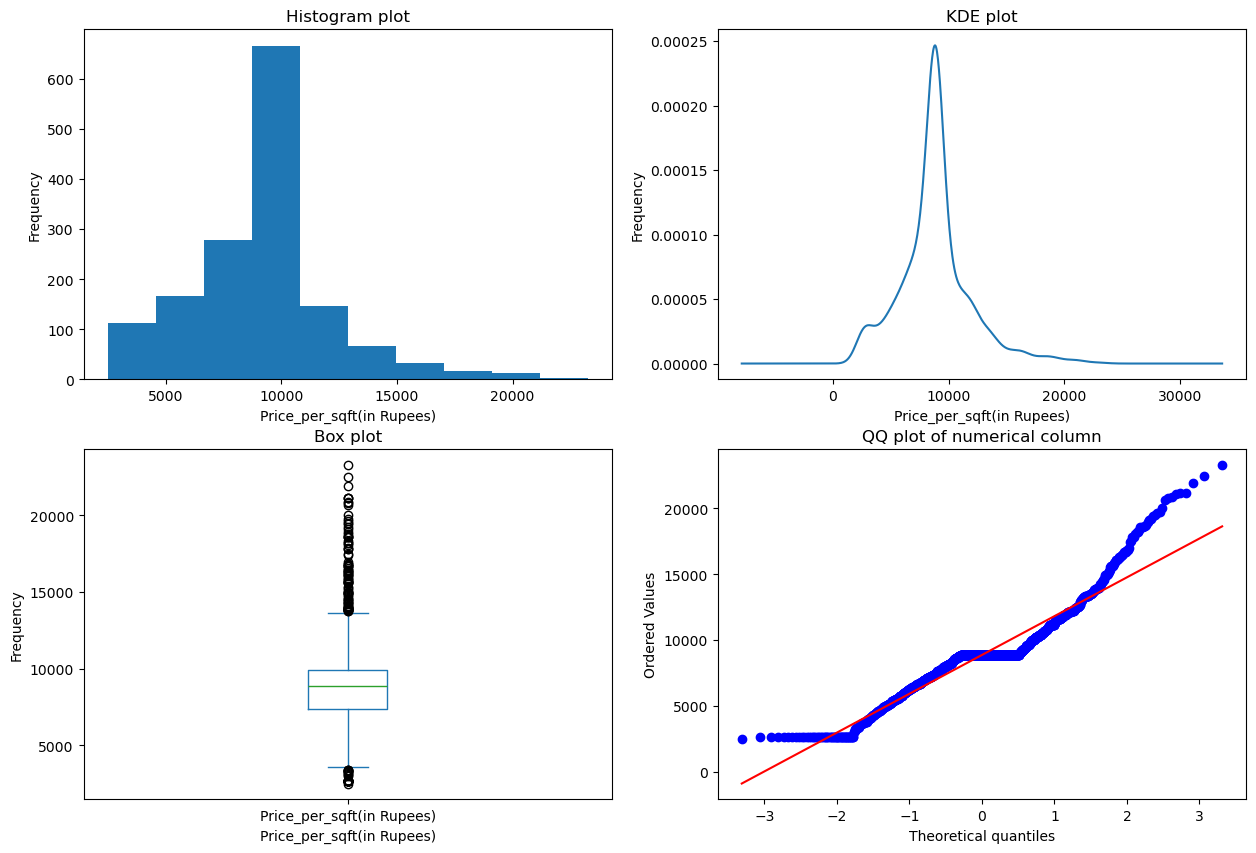

In [101]:
numerical(flat_data,'Price_per_sqft(in Rupees)')

In [211]:
def plot_histograms(df, bins=20):
    numeric_cols = df.select_dtypes(include=['number']).columns 
    num_cols = len(numeric_cols)

    plt.figure(figsize=(15, 5 * (num_cols // 2 + 1)))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot((num_cols // 2) + 1, 2, i)
        sns.histplot(df[col].dropna(), bins=bins, kde=True,color='skyblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

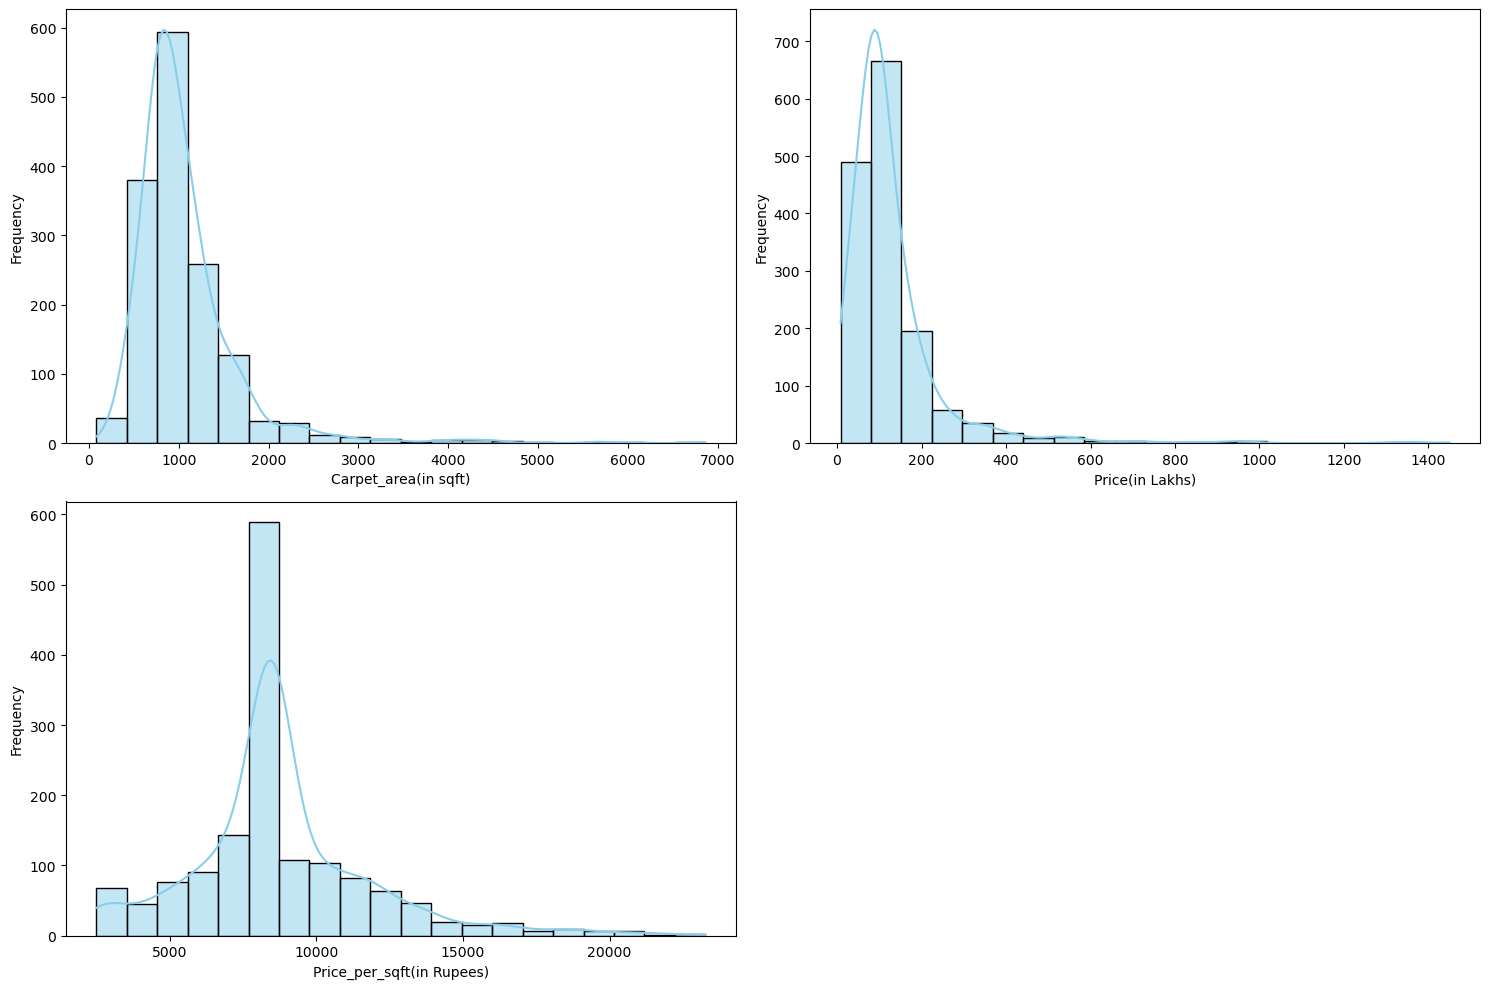

In [273]:
plot_histograms(flat_data)

# Observation : 
The distributions for Carpet Area, Price, and Price per Sqft are right-skewed. Most flats have a carpet area between 500–1500 sqft and are priced under 200 lakhs. The price per sqft is commonly between 8000–12000 INR, indicating typical market rates, with a few outliers showing premium properties

# Make a function for categorical columns 

In [274]:
def categorical(data,column_name):
    if column_name in data:
        data[column_name].agg(['count','unique'])
        ## plotting the bar plot 
        plt.figure(figsize=(14,4))
        data[column_name].value_counts().plot(kind='bar',color='lightskyblue')
        plt.title('Bar Plot')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.show()
        ## count plot
        plt.figure(figsize=(14,4))
        sns.countplot(x=data[column_name])
        plt.title("Count plot")
        plt.xlabel(column_name)
        plt.ylabel('Count')
        #plt.xticks(rotation=30)
        plt.show()
        ## pie chart
        plt.figure(figsize=(10,10))
        data[column_name].value_counts().plot(kind='pie',autopct='%1.1f%%')
        plt.title('Pie Chart')
        plt.show()

In [275]:
categorical_col

['Flat_type',
 'Locality',
 'City',
 'Project_name',
 'Present_status',
 'Floor_number',
 'Total_floors',
 'Furnishing',
 'No_of_bathrooms']

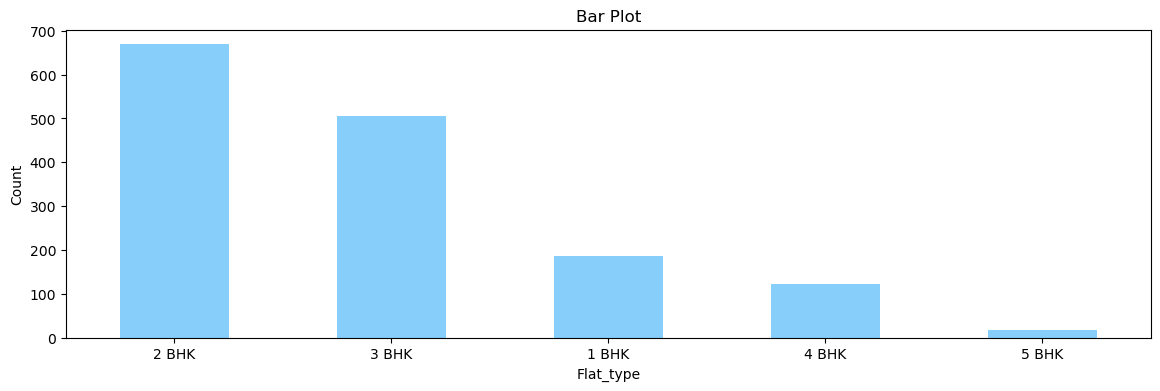

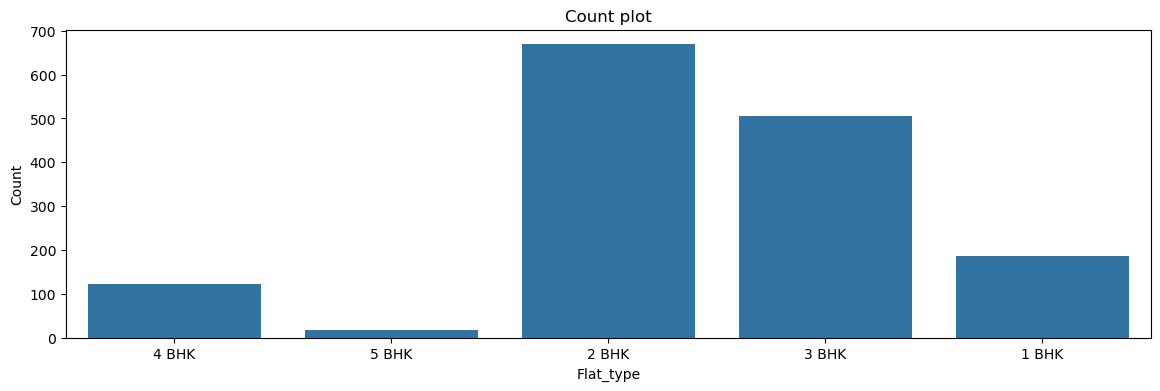

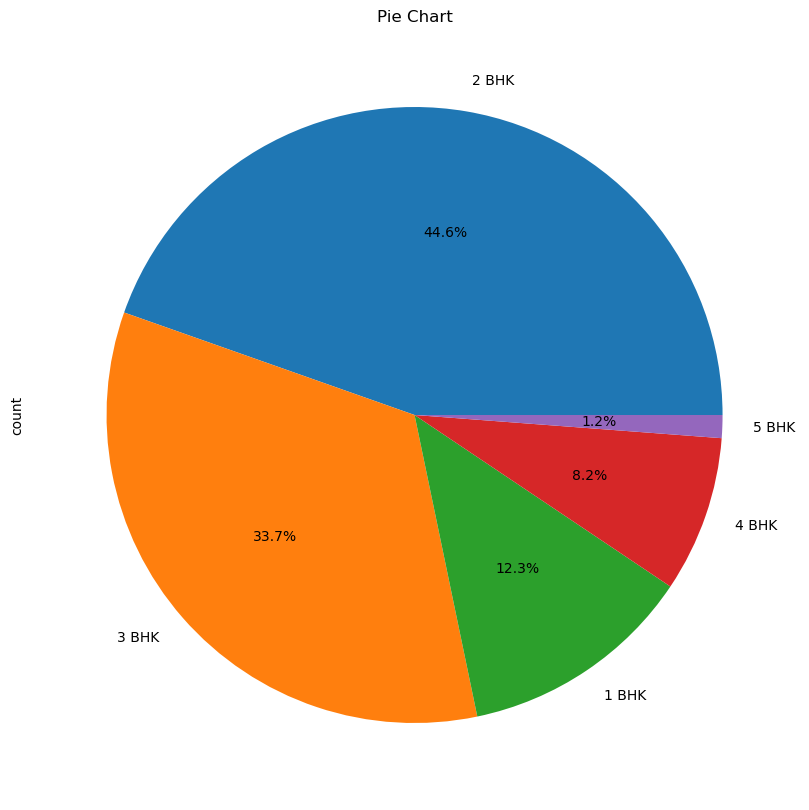

In [276]:
categorical(flat_data,'Flat_type')

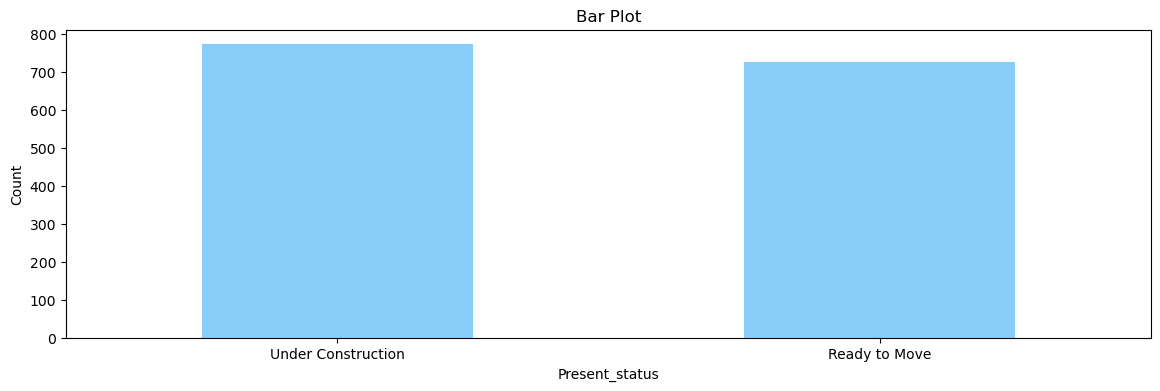

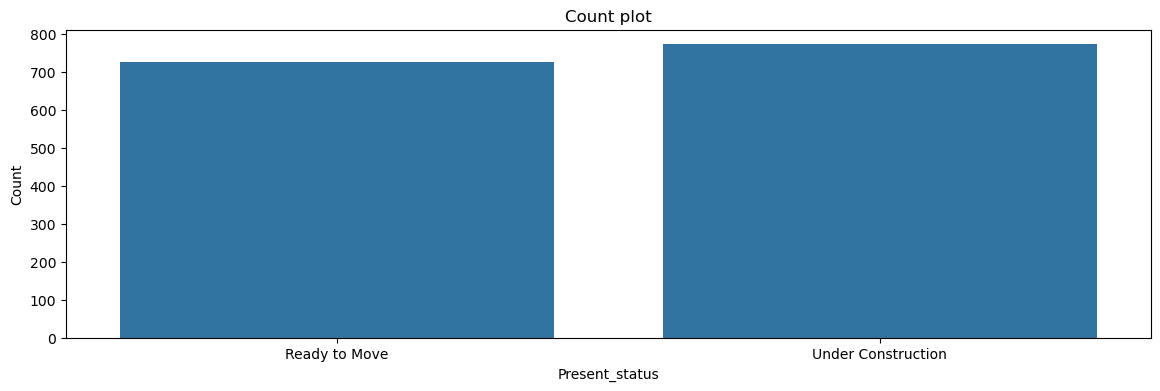

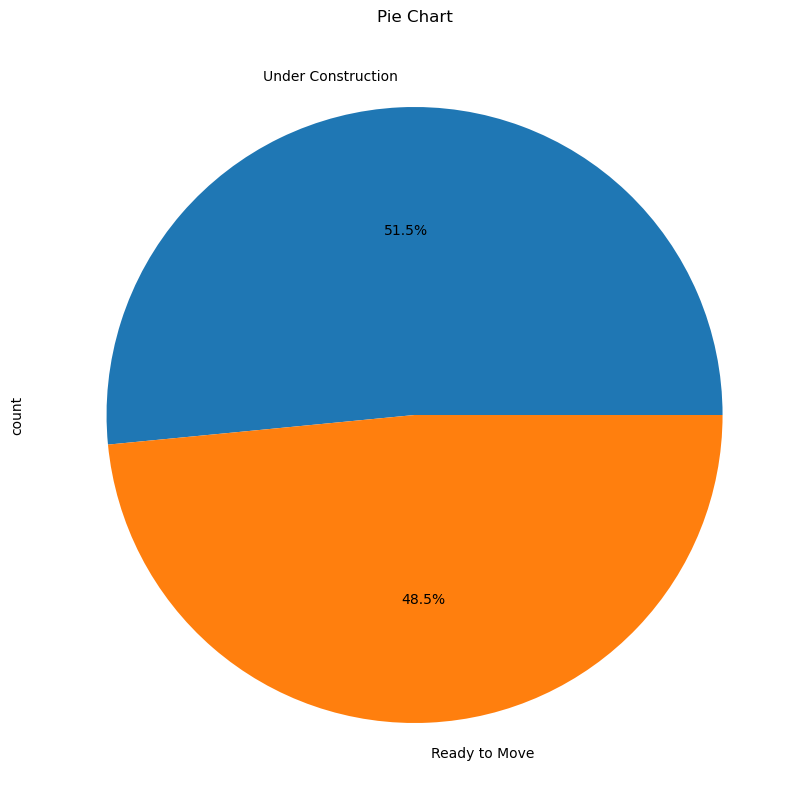

In [131]:
categorical(flat_data,'Present_status')

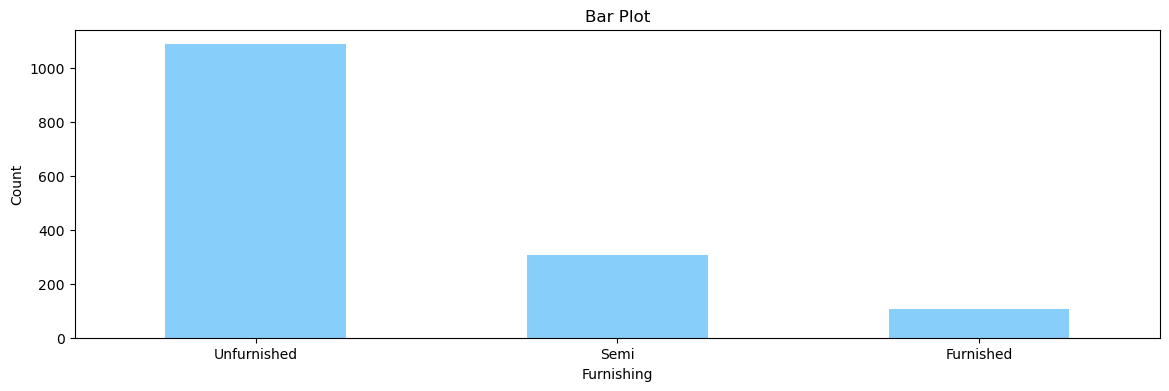

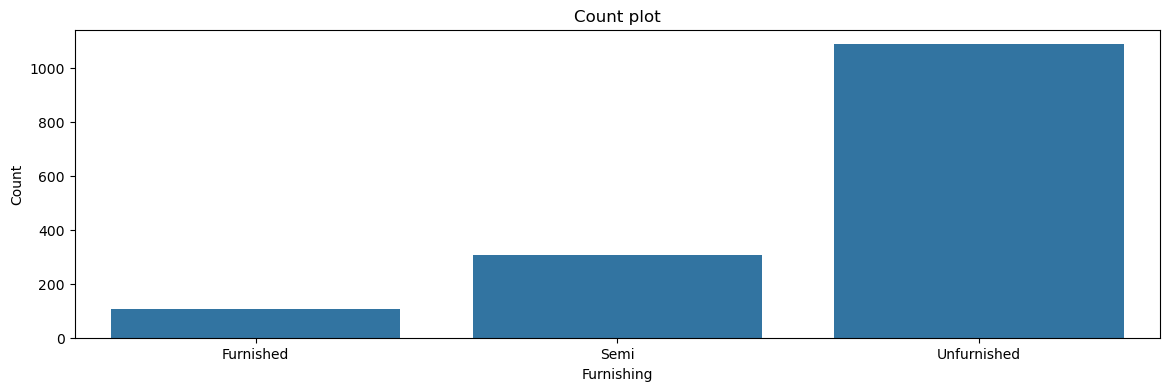

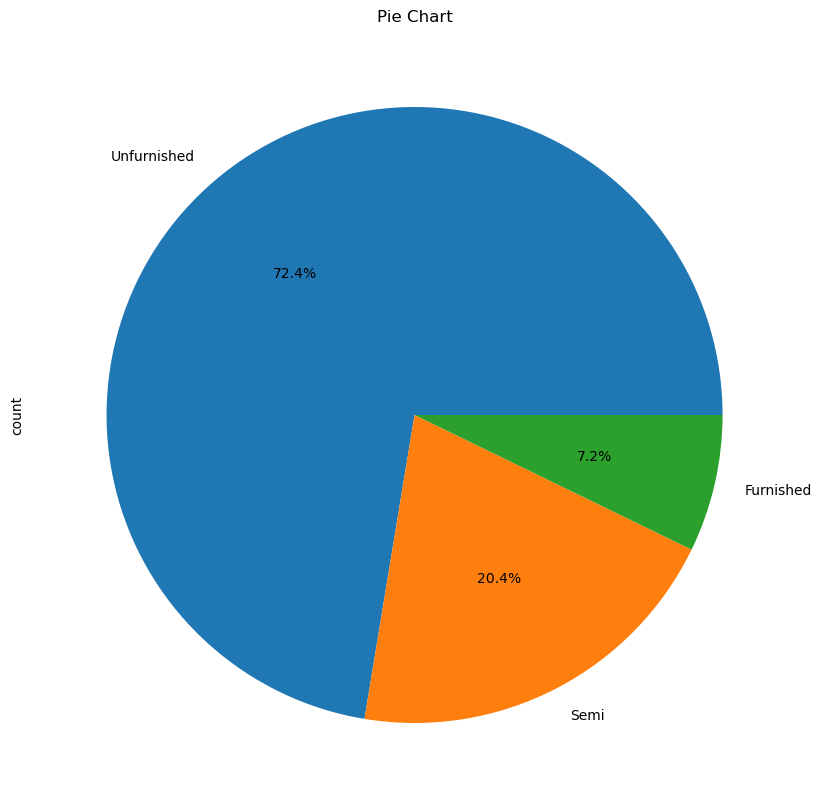

In [132]:
categorical(flat_data,'Furnishing')

# Observation : 
- Flat Type Distribution: 2 BHK and 3 BHK flats are most common, indicating higher demand for mid-sized homes.
- Present Status: Under-construction and ready-to-move properties are nearly equal, showing balanced availability.
- Furnishing Status: Unfurnished flats dominate, suggesting buyers prefer customizing interiors or opting for lower costs

# Bivariate Analysis 

# Making a function for categorical vs numerical data

In [277]:
def categorical_vs_numerical(data,cat_column,num_column):
    ## Box plot
    plt.figure(figsize=(12,8))
    sns.boxplot(x=data[cat_column],y=data[num_column],palette='Set2')
    plt.title(f'Boxplot of :{num_column} vs {cat_column}')
    plt.xlabel(cat_column)
    plt.ylabel(num_column)
    #plt.xticks(rotation=45)
    plt.show()
    ## Violin plot
    plt.figure(figsize=(12,8))
    sns.violinplot(x=data[cat_column],y=data[num_column],palette='Set2')
    plt.title(f'Violin plot of :{num_column} vs {cat_column}')
    plt.xlabel(cat_column)
    plt.ylabel(num_column)
    #plt.xticks(rotation=45)
    plt.show()
    ## Bar chart
    plt.figure(figsize=(12,8))
    sns.barplot(x=data[cat_column],y=data[num_column],palette='Set2',ci=None)
    plt.title(f'Barplot of {num_column} vs {cat_column}')
    plt.xlabel(cat_column)
    plt.ylabel(f'Mean of :{num_column}')
    #plt.xticks(rotation=45)
    plt.show()

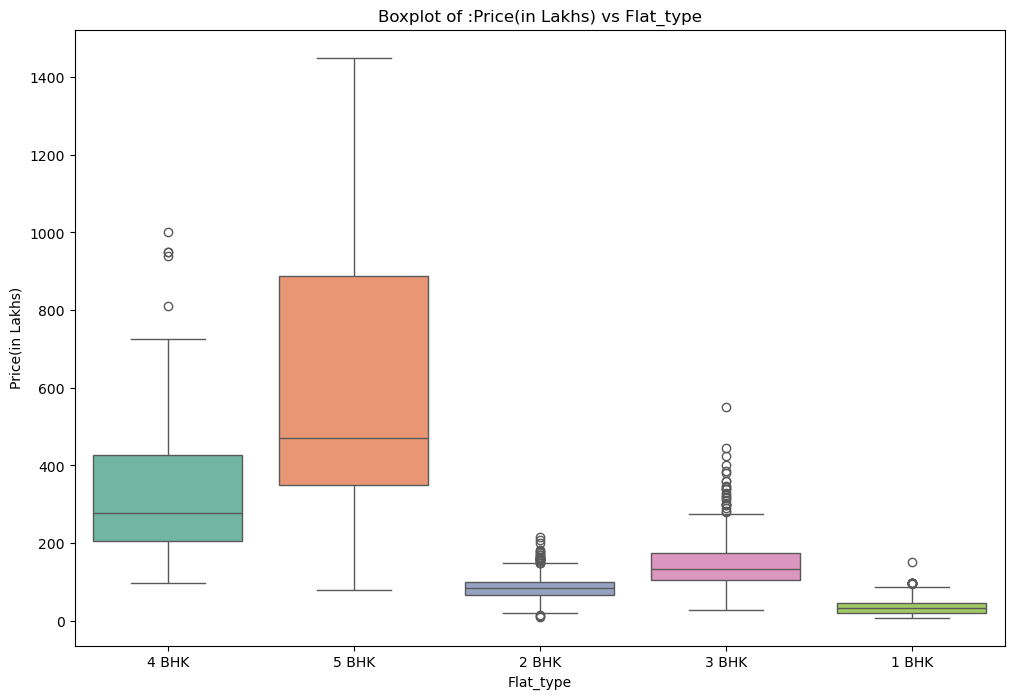

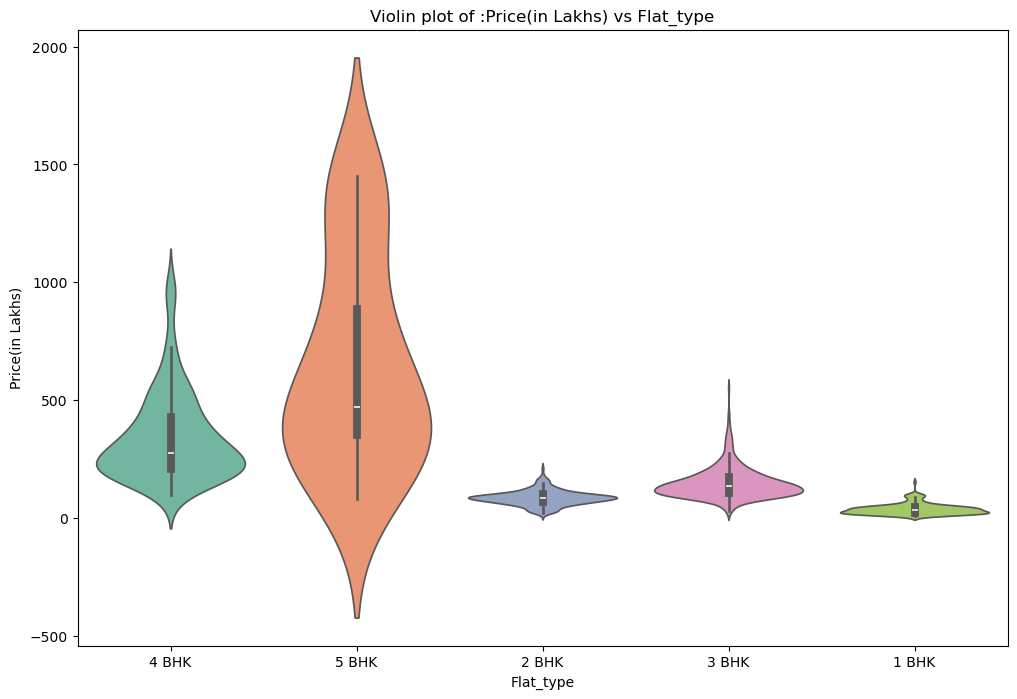

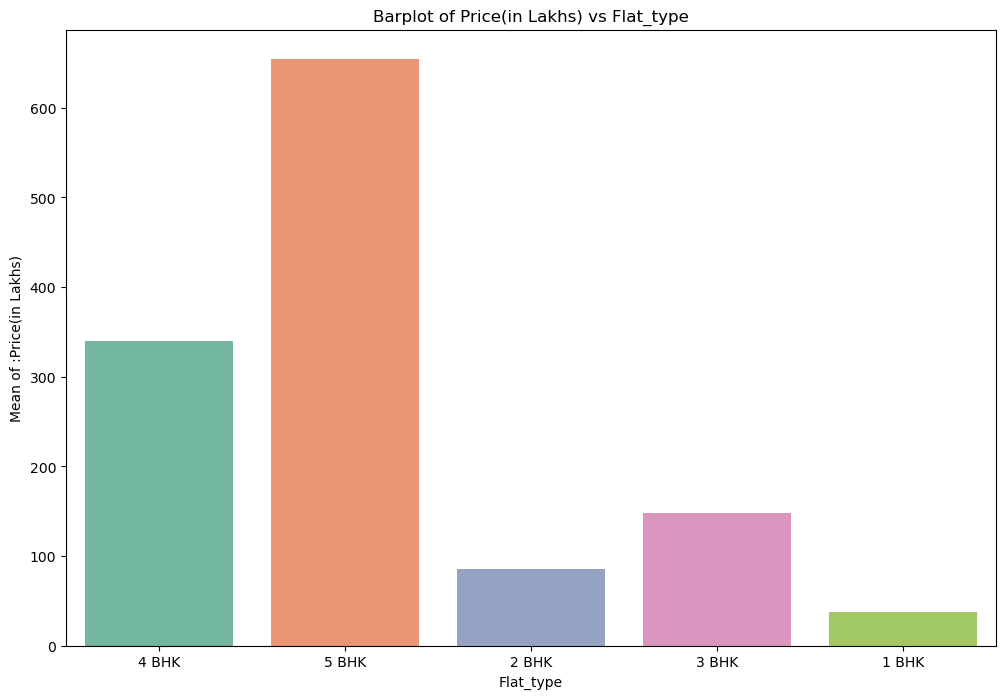

In [213]:
categorical_vs_numerical(flat_data,'Flat_type','Price(in Lakhs)')

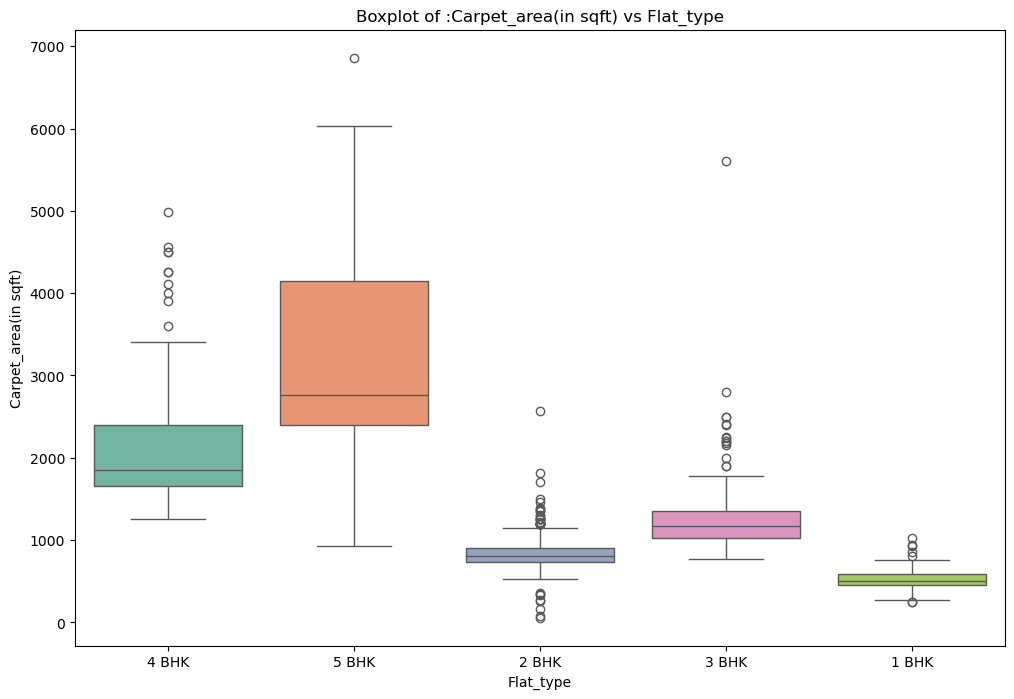

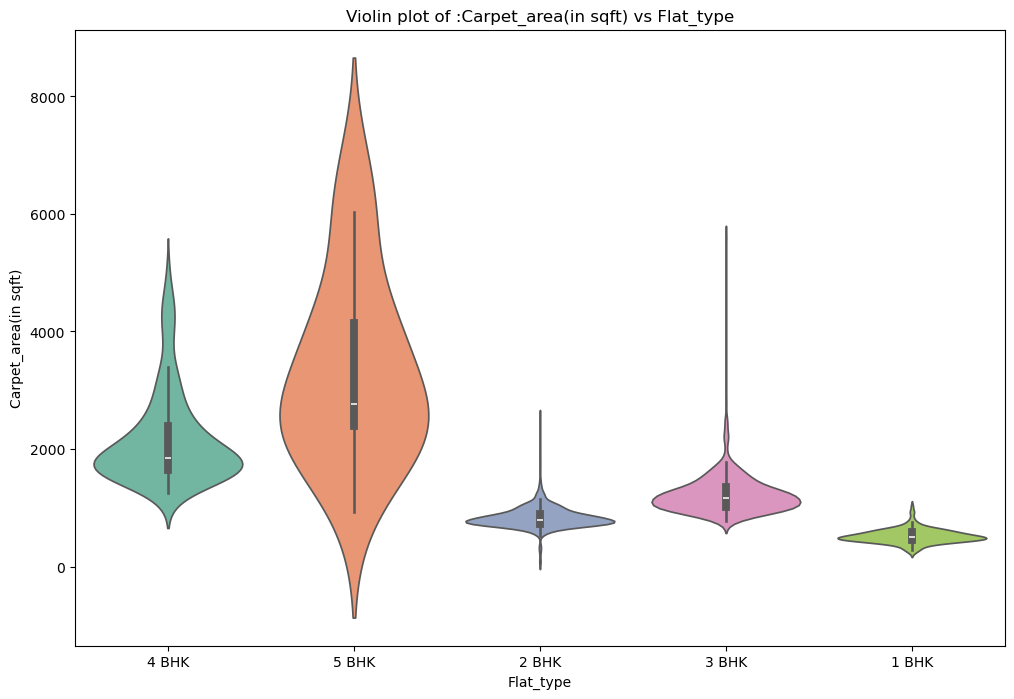

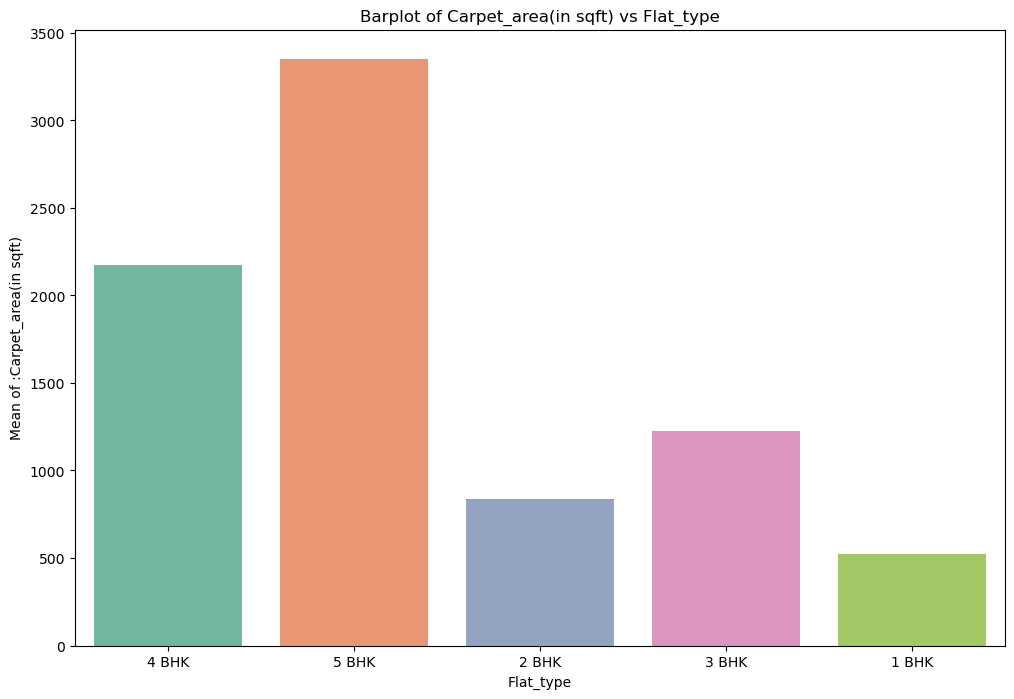

In [214]:
categorical_vs_numerical(flat_data,'Flat_type','Carpet_area(in sqft)')

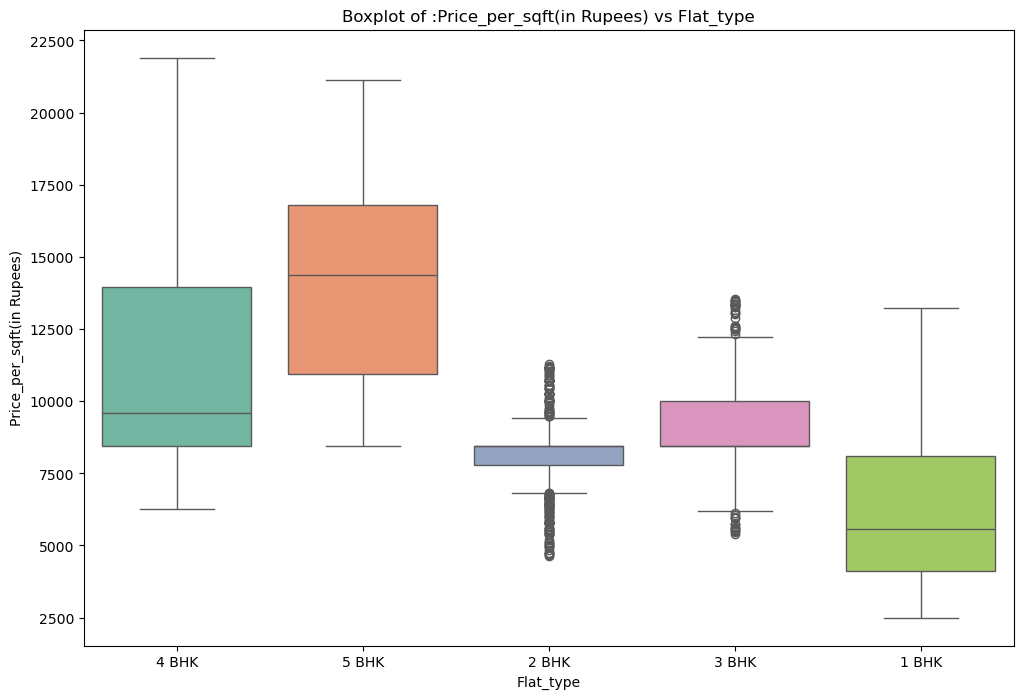

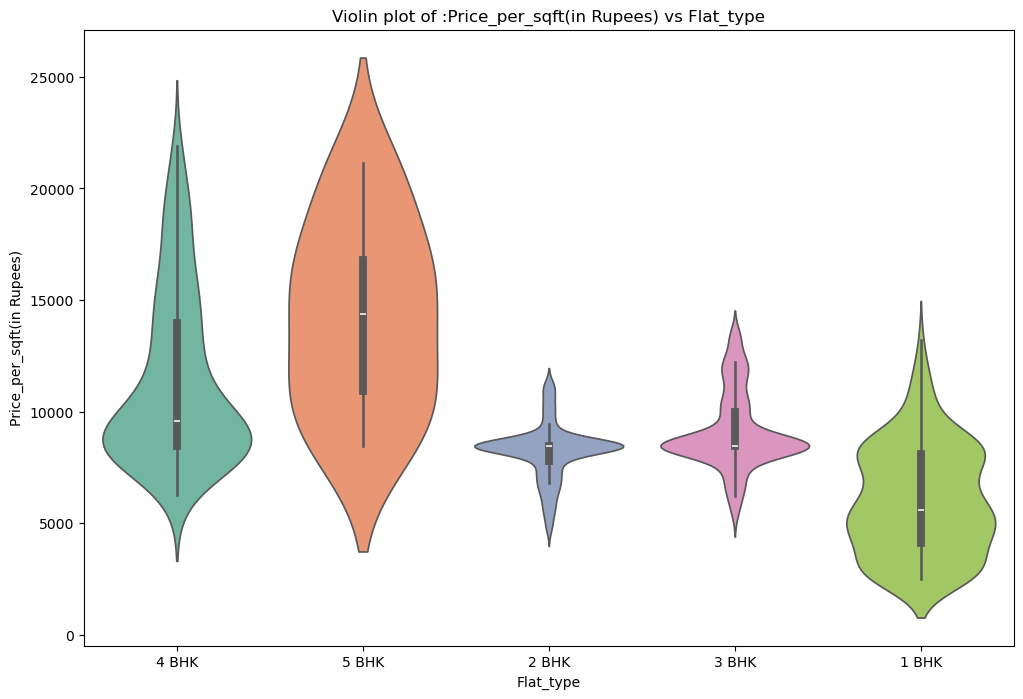

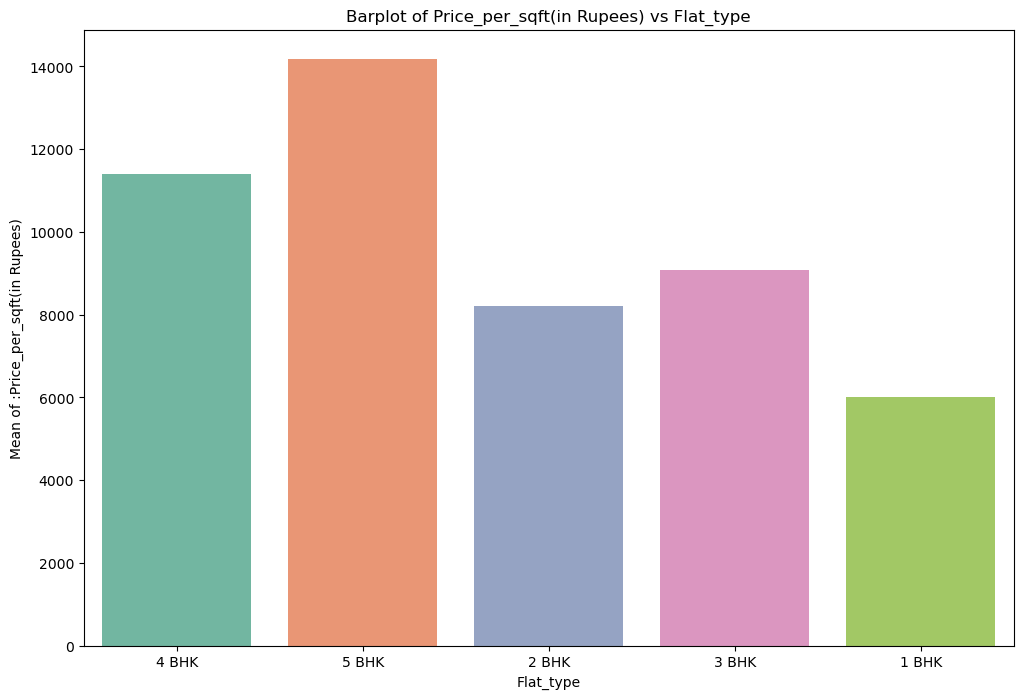

In [215]:
clean_data = replace_outliers_with_median(flat_data.copy(),'Flat_type','Price_per_sqft(in Rupees)')
categorical_vs_numerical(clean_data,'Flat_type','Price_per_sqft(in Rupees)')

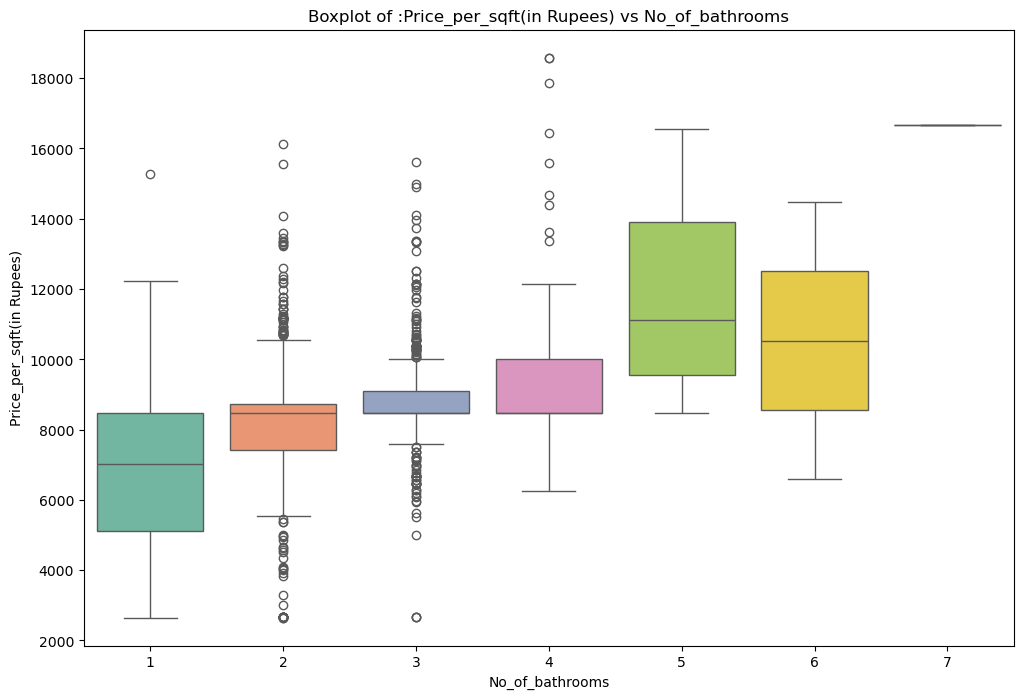

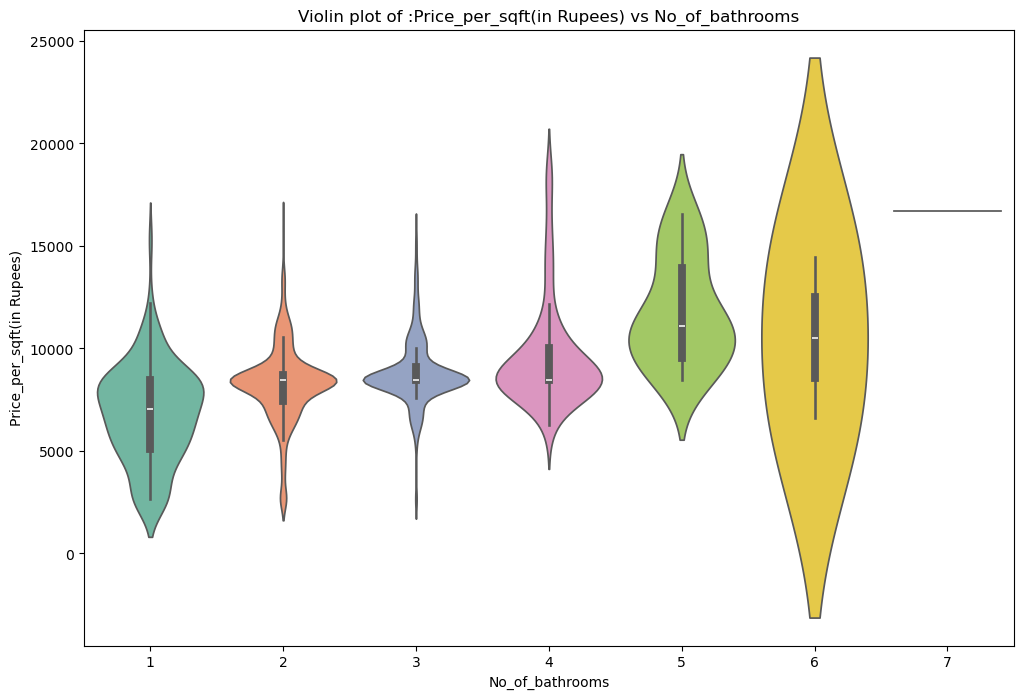

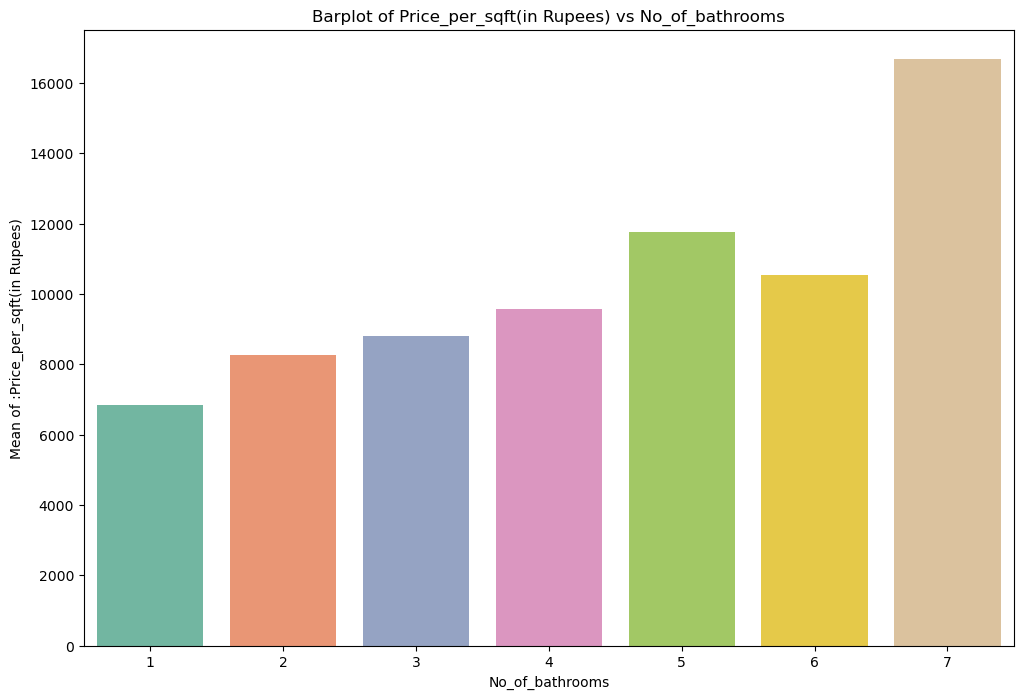

In [278]:
categorical_vs_numerical(clean_data,'No_of_bathrooms','Price_per_sqft(in Rupees)')

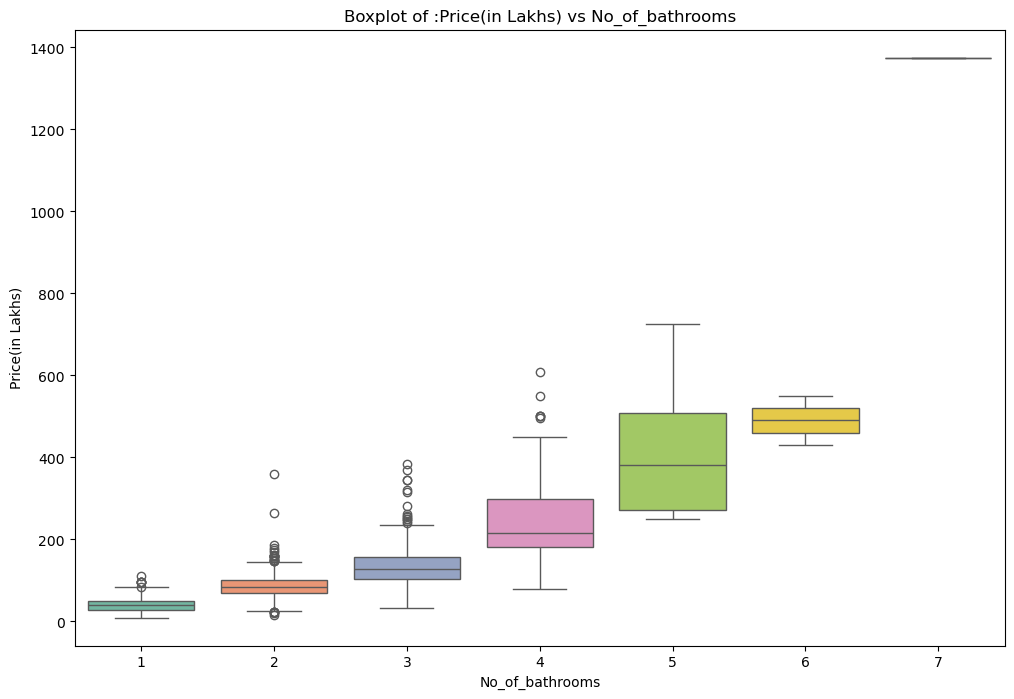

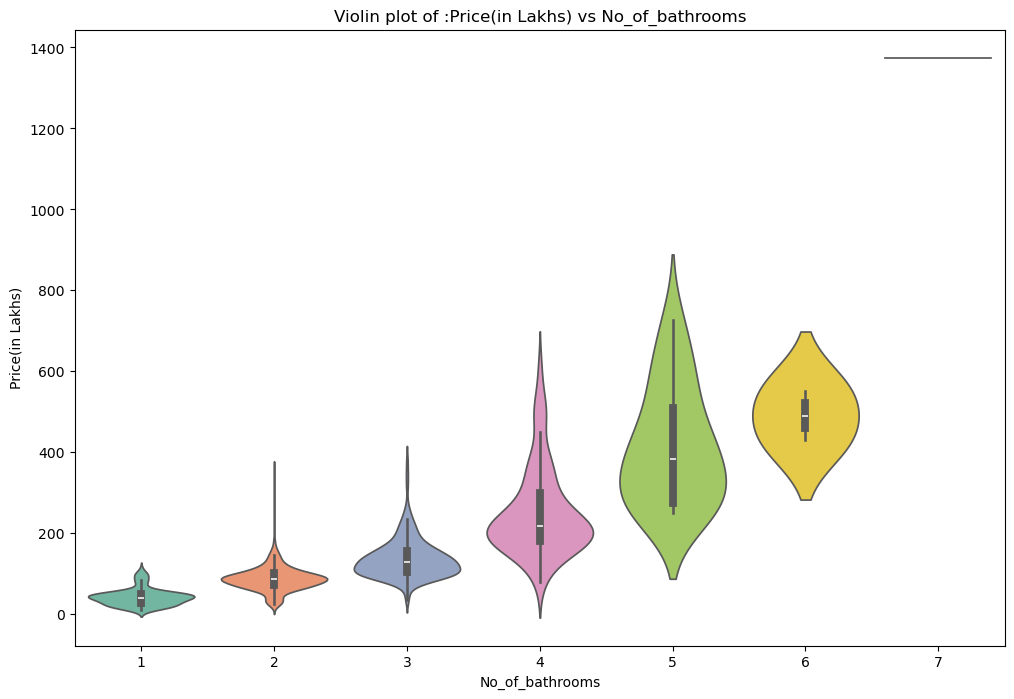

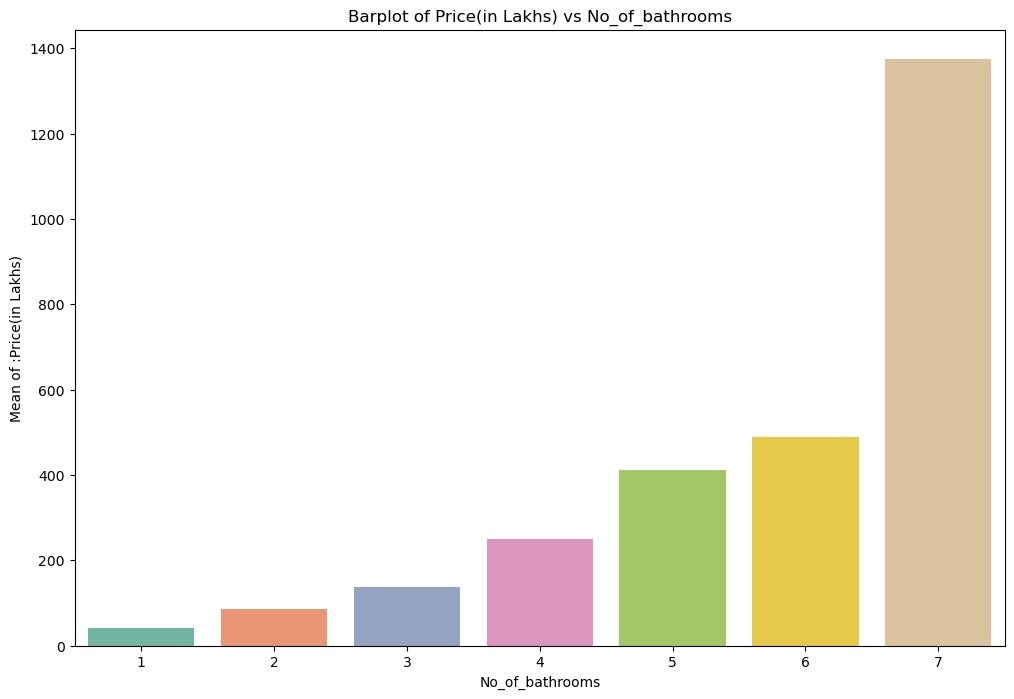

In [286]:
categorical_vs_numerical(clean_data,'No_of_bathrooms','Price(in Lakhs)')

# Observation : 
- 5 BHK and 4 BHK properties have the highest price ranges, with 5 BHK showing the widest spread and the most outliers, indicating luxury segments.
- 2 BHK and 3 BHK properties are more densely clustered with lower median prices, making them popular and affordable options.
- 1 BHK has the lowest price range and least variability, indicating it's mostly budget housing.
-Outliers are present across all categories, particularly for higher BHK types, showing the presence of ultra-premium listings

In [136]:
def replace_outliers_with_median(df, group_col, target_col):

    df_cleaned = df.copy()

    def process_group(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = group[target_col].median()

        group[target_col] = group[target_col].apply(
            lambda x: median_value if (x < lower_bound or x > upper_bound) else x
        )
        return group

    return df_cleaned.groupby(group_col, group_keys=False).apply(process_group)

In [224]:
def remove_outliers_by_category(data, category_col, numeric_col):
    data_cleaned = data.copy()
  
    for category in data_cleaned[category_col].unique():
        subset = data_cleaned[data_cleaned[category_col] == category]
        
        Q1 = subset[numeric_col].quantile(0.25)
        Q3 = subset[numeric_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_cleaned = data_cleaned[
            ~((data_cleaned[category_col] == category) & 
              ((data_cleaned[numeric_col] < lower_bound) | (data_cleaned[numeric_col] > upper_bound)))
        ]
    
    return data_cleaned

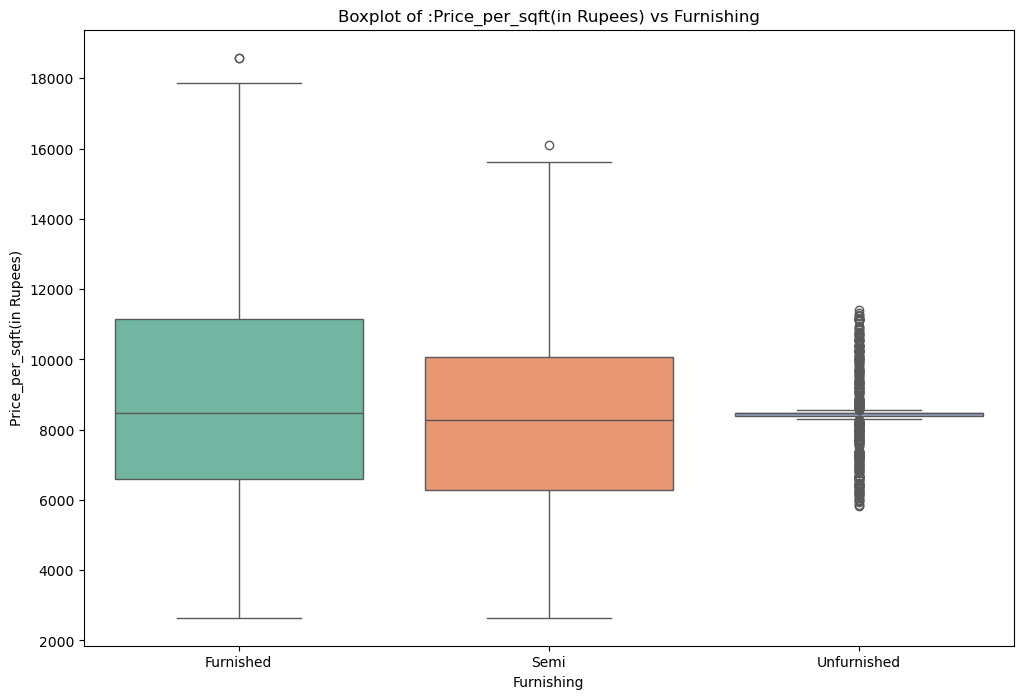

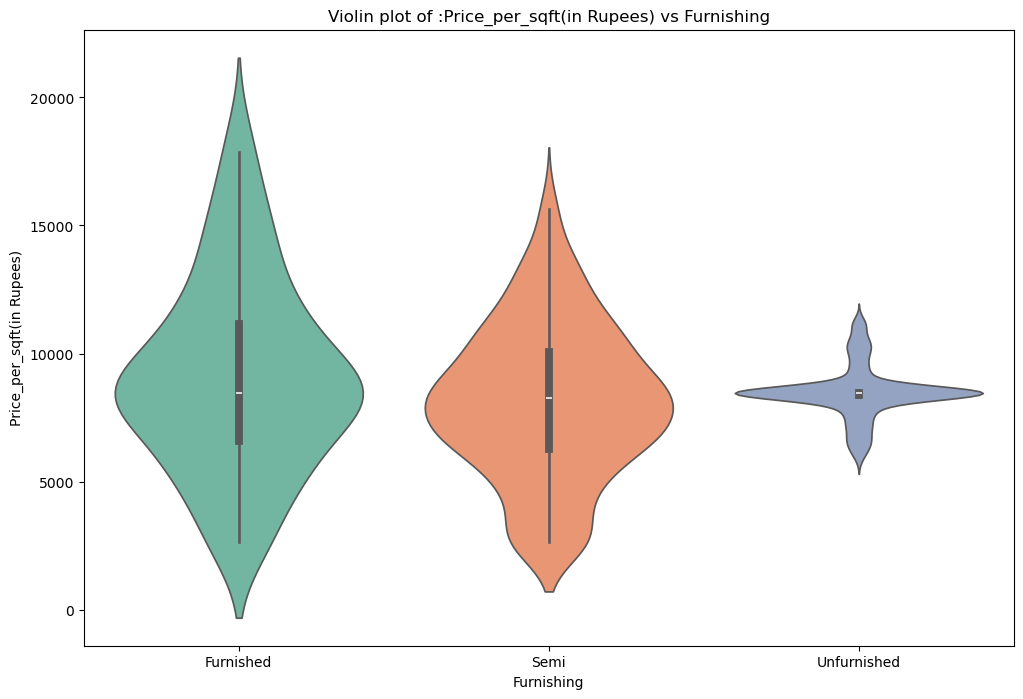

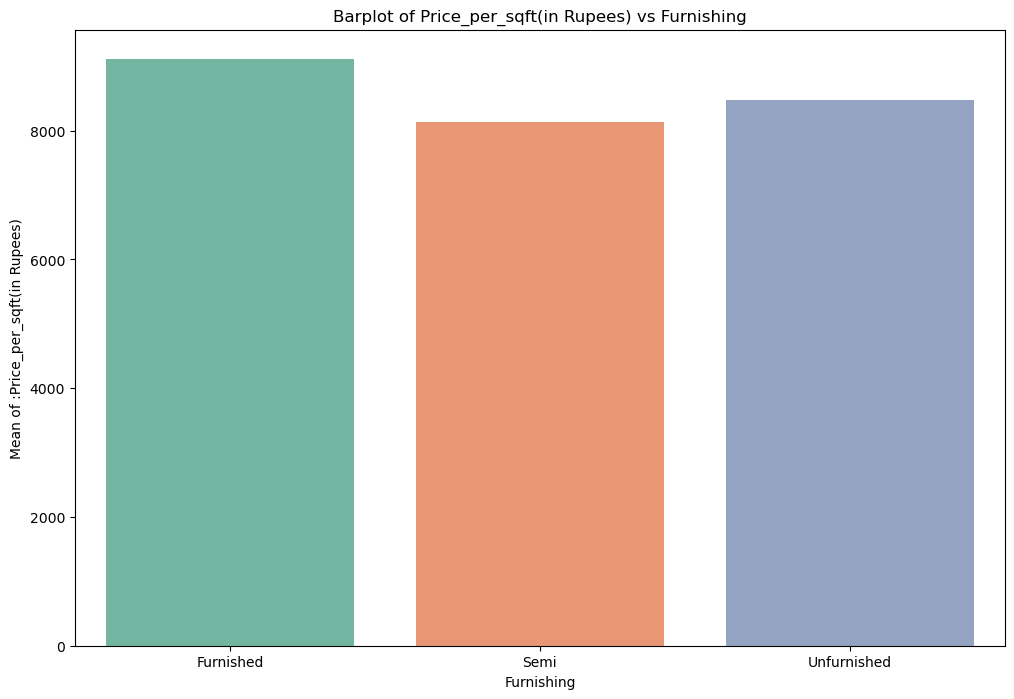

In [226]:
clean_data = remove_outliers_by_category(flat_data.copy(),'Furnishing','Price_per_sqft(in Rupees)')
categorical_vs_numerical(clean_data,'Furnishing','Price_per_sqft(in Rupees)')

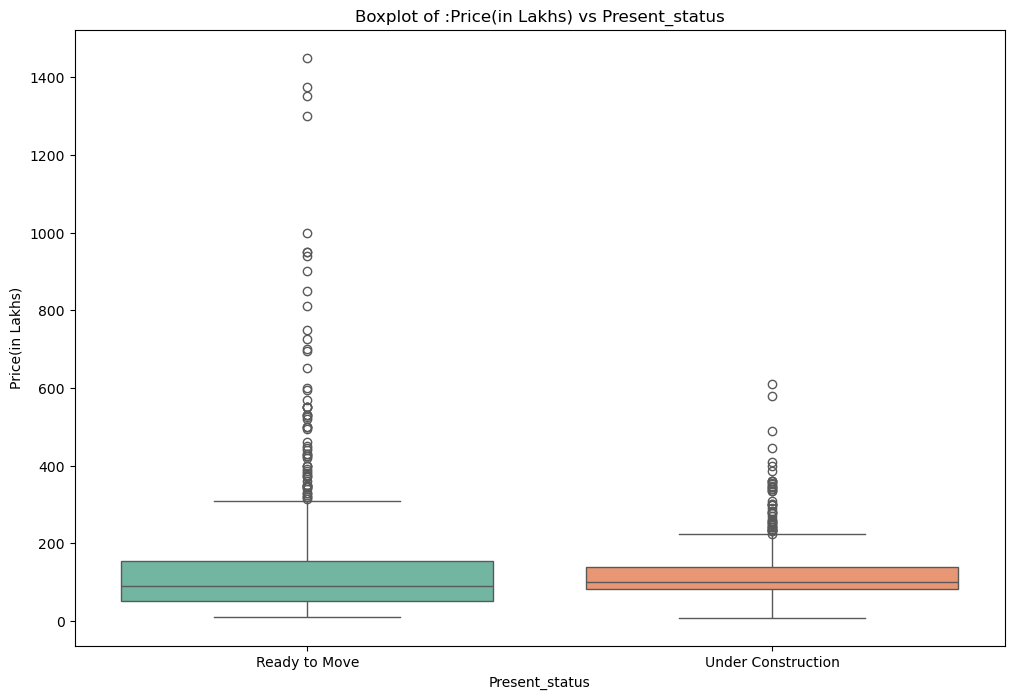

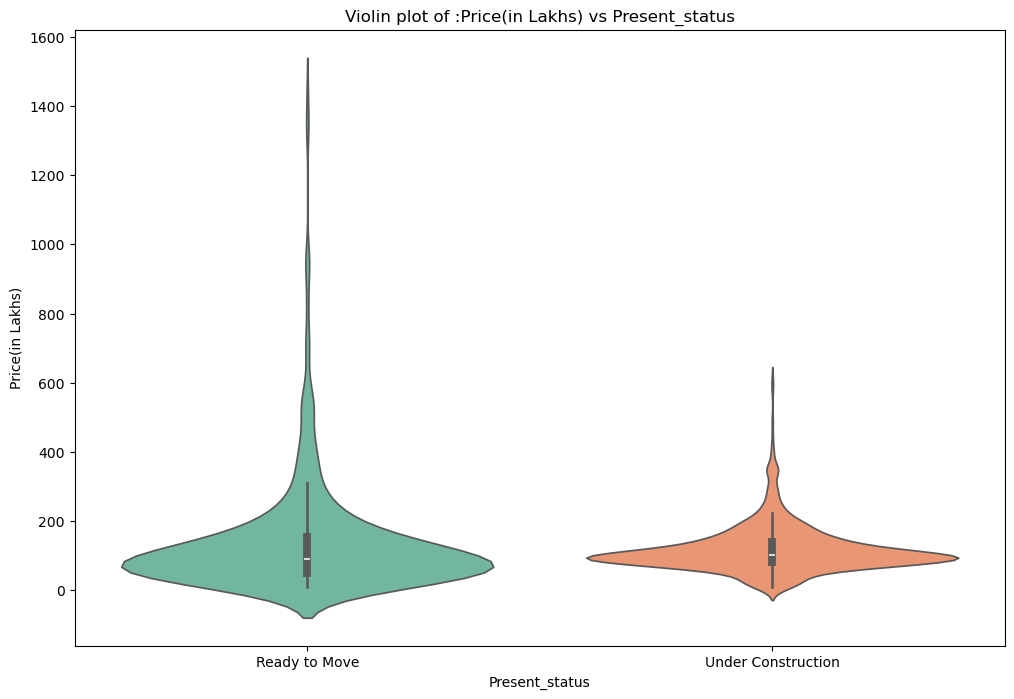

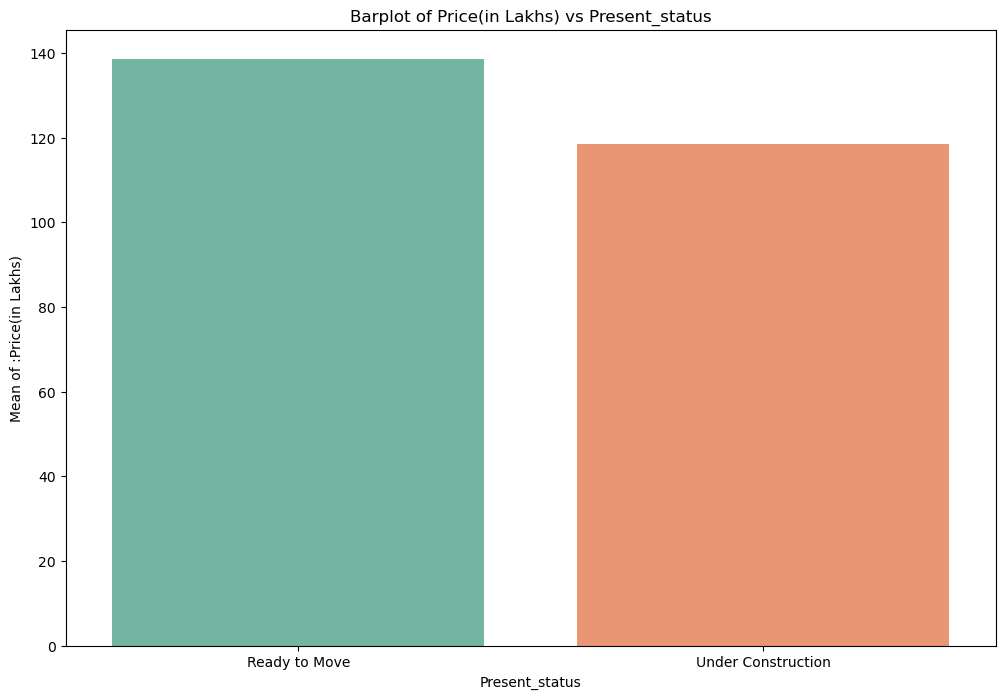

In [227]:
categorical_vs_numerical(flat_data,'Present_status','Price(in Lakhs)')

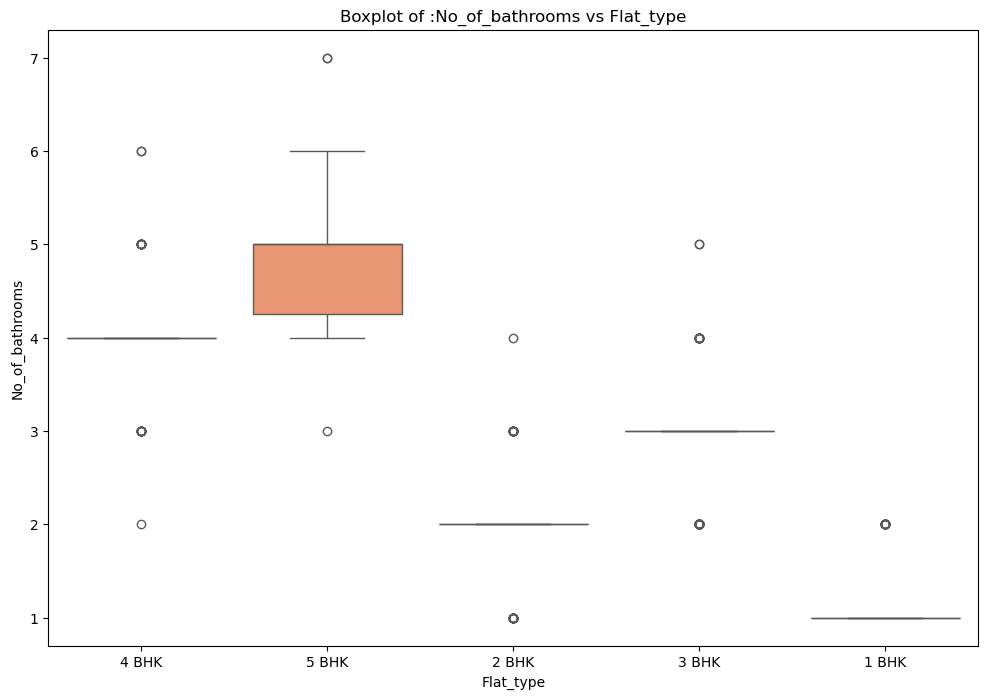

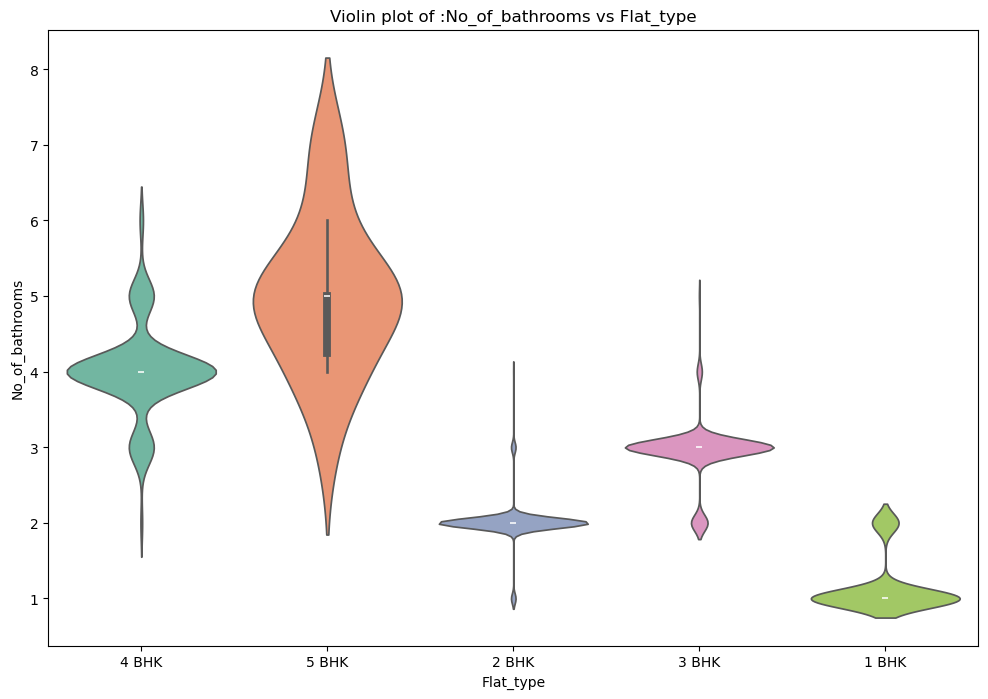

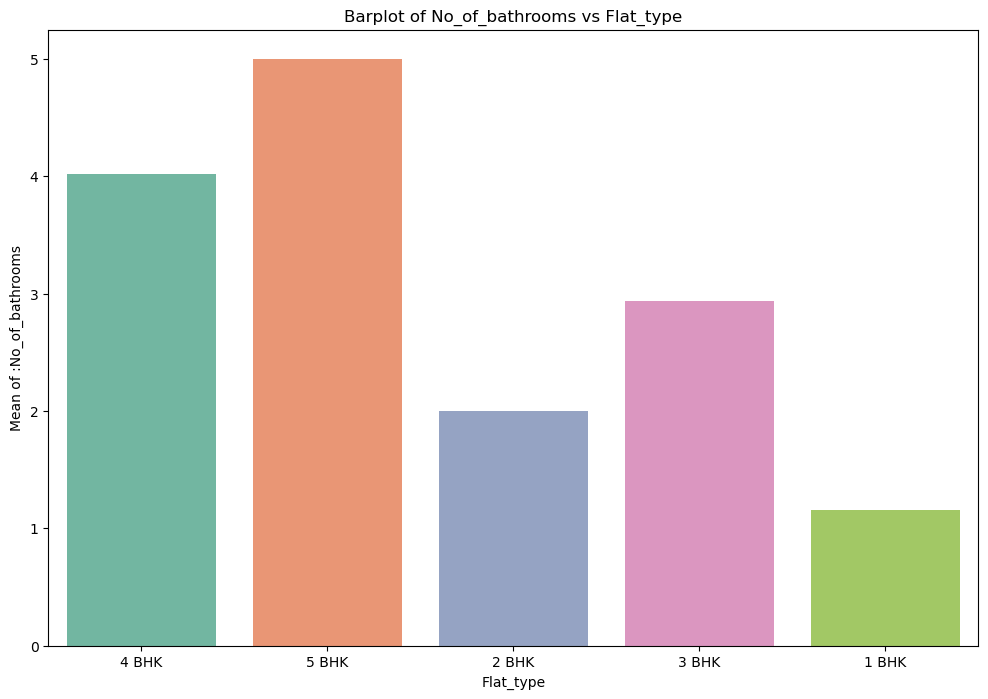

In [228]:
categorical_vs_numerical(flat_data,'Flat_type','No_of_bathrooms')

In [283]:
categorical_col

['Flat_type',
 'Locality',
 'City',
 'Project_name',
 'Present_status',
 'Floor_number',
 'Total_floors',
 'Furnishing',
 'No_of_bathrooms']

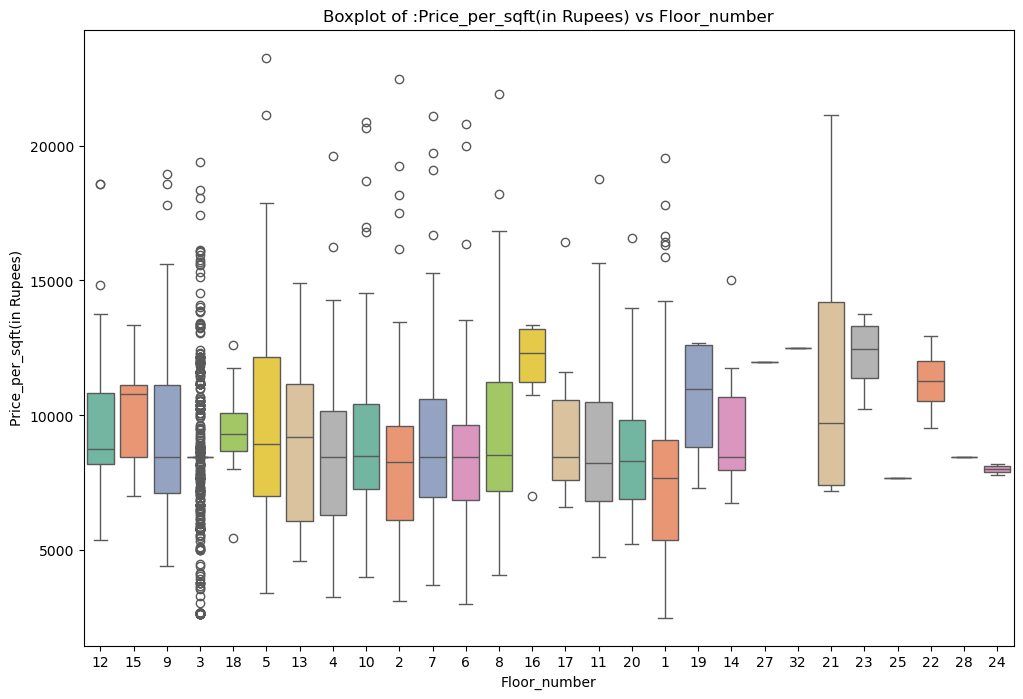

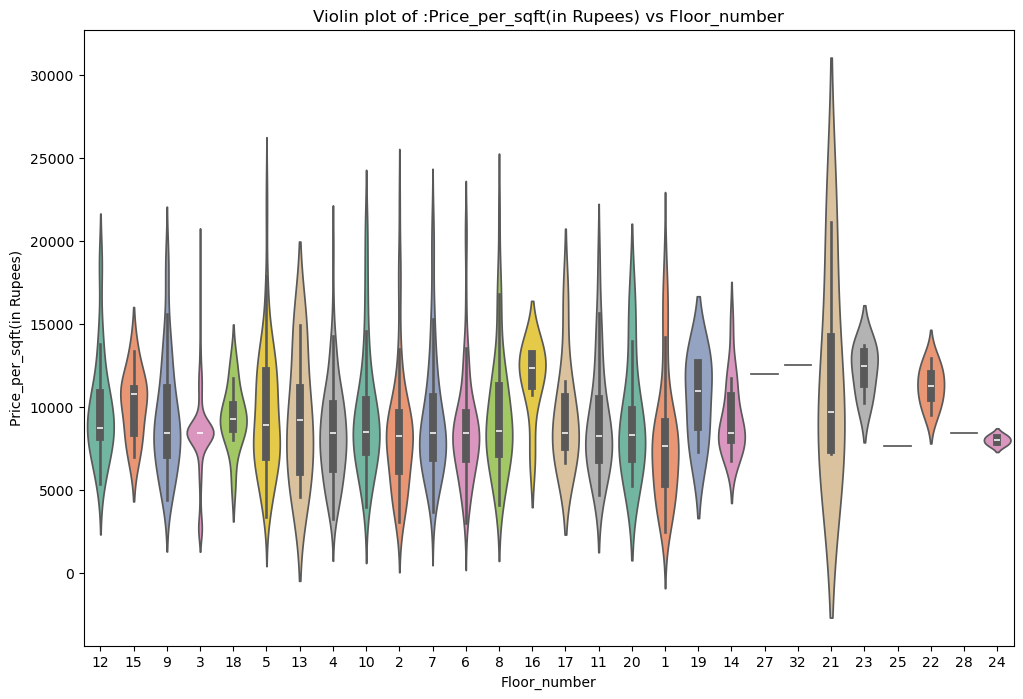

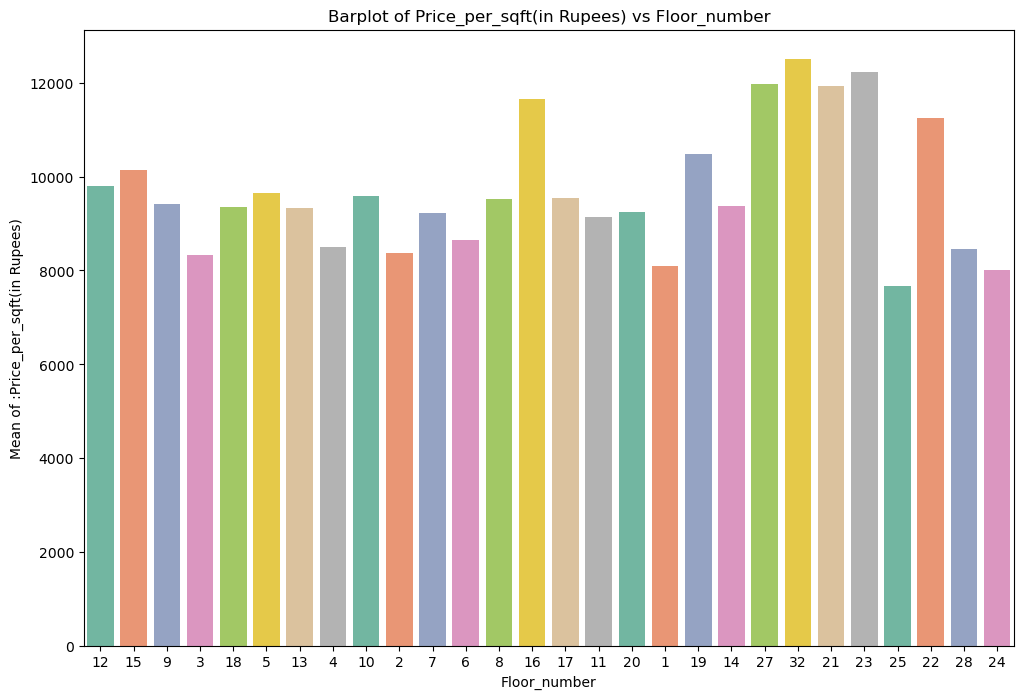

In [282]:
categorical_vs_numerical(flat_data,'Floor_number','Price_per_sqft(in Rupees)')

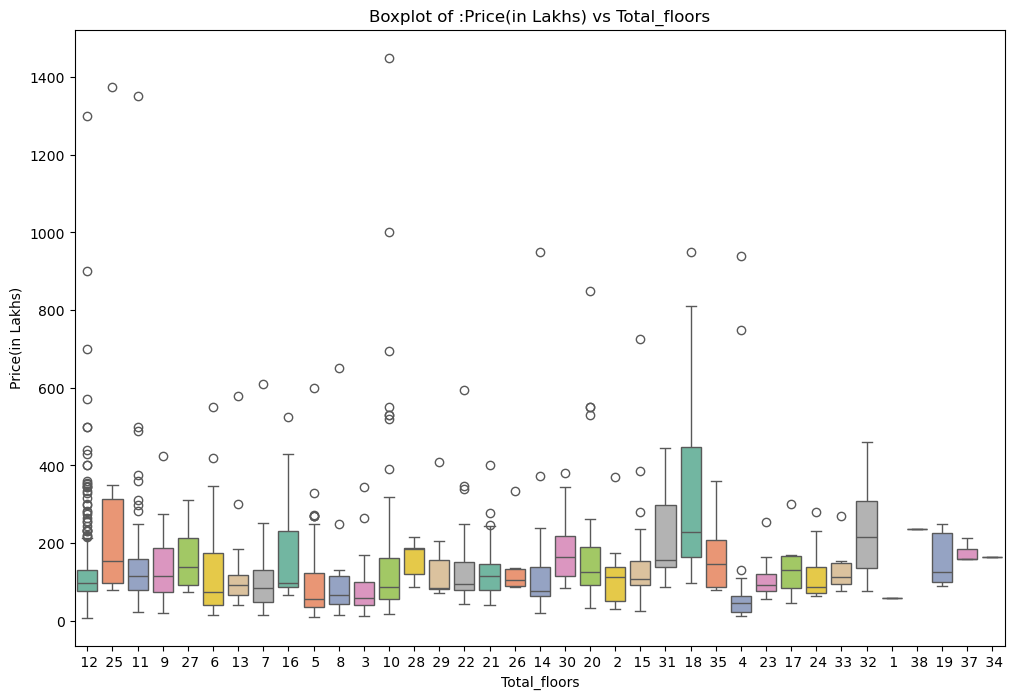

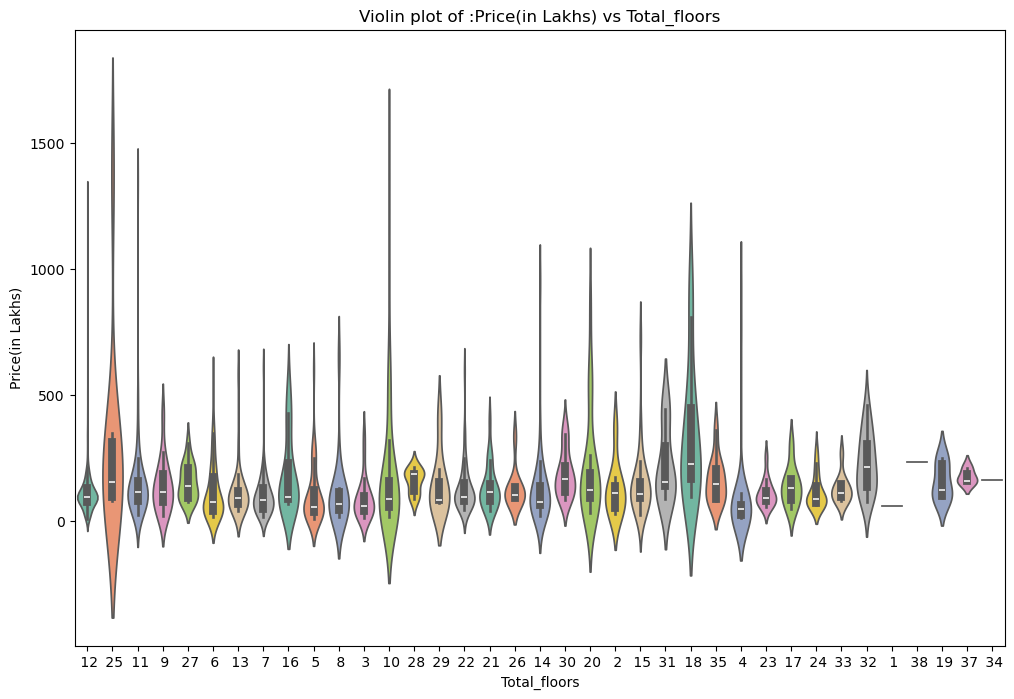

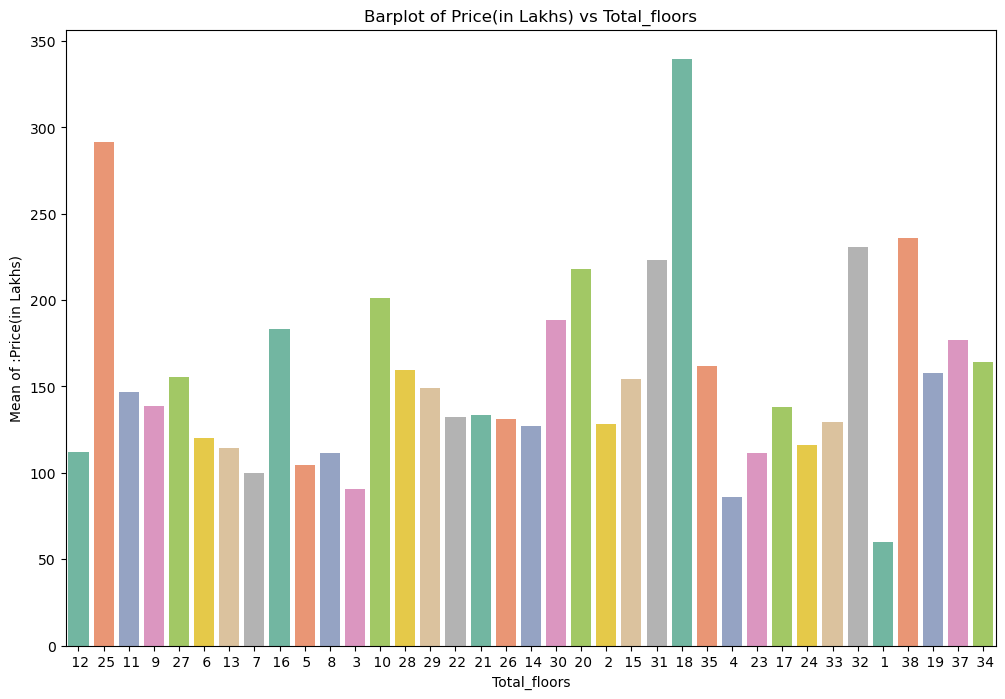

In [285]:
categorical_vs_numerical(flat_data,'Total_floors','Price(in Lakhs)')

# observation : 
- Semi-furnished properties tend to have a slightly higher median price per sqft compared to furnished and unfurnished properties.
- Furnished properties show the highest variability in price per sqft.
- Unfurnished properties exhibit the lowest variability in price per sqft for the majority of the data, but have several outliers indicating some extreme values

# making a function for numerical vs numerical columns 

In [279]:
def numerical_vs_numerical(data,num_column1,num_column2):
    ## scatter plot
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=data[num_column1],y=data[num_column2],color='b')
    plt.title(f'Scatter Plot of :{num_column1} vs {num_column2}')
    plt.xlabel(num_column1)
    plt.ylabel(num_column2)
    plt.show()
    ## correlation heatmap
    corr_data = data[[num_column1,num_column2]].corr()
    plt.figure(figsize=(10,4))
    sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlational Heatmap of :{num_column1} vs {num_column2}')
    plt.show()
    ## pair plot
    plt.figure(figsize=(12,8))
    sns.pairplot(data[[num_column1,num_column2]])
    plt.suptitle(f'Pair plot of :{num_column1} vs {num_column2}',fontsize=16,y=1.05)
    plt.show()
    ## regression plot for clearly visualizing the trend within our data
    plt.figure(figsize=(7,6))
    sns.regplot(x=data[num_column1],y=data[num_column2],scatter_kws={'color':'blue'},line_kws={'color':'red'})
    plt.title(f'Regression Plot of :{num_column1} vs {num_column2}')
    plt.xlabel(num_column1)
    plt.ylabel(num_column2)
    plt.show()

In [280]:
numerical_col

['Carpet_area(in sqft)', 'Price(in Lakhs)', 'Price_per_sqft(in Rupees)']

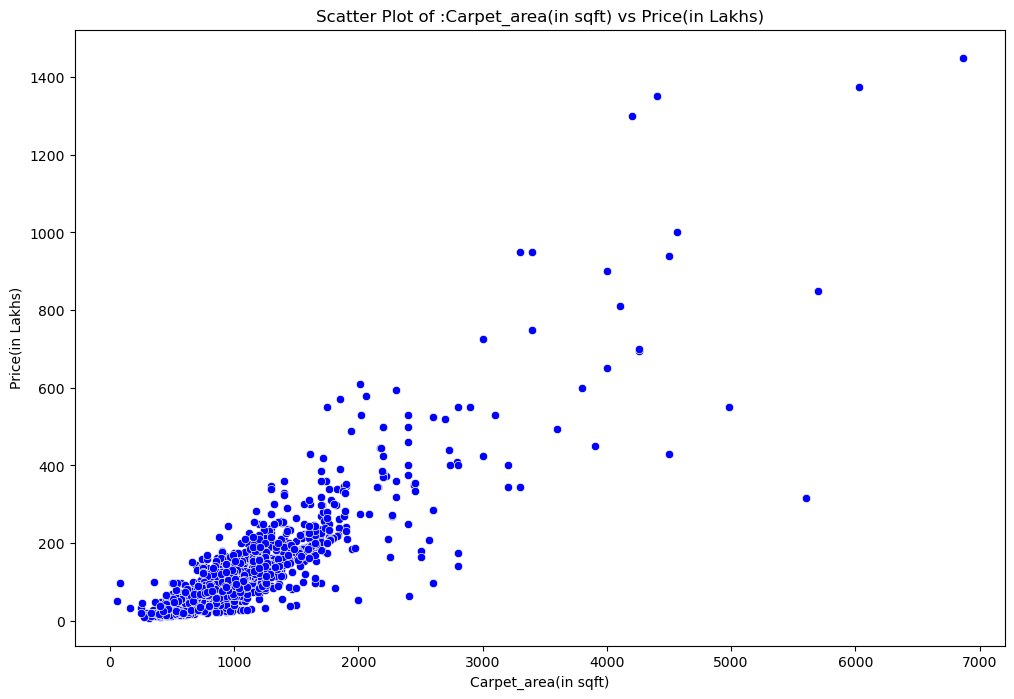

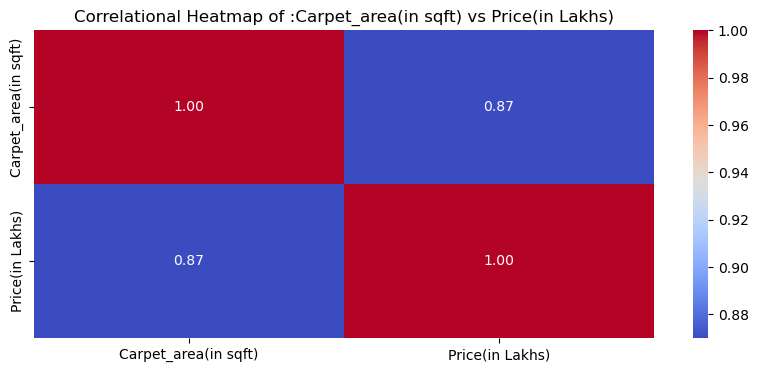

<Figure size 1200x800 with 0 Axes>

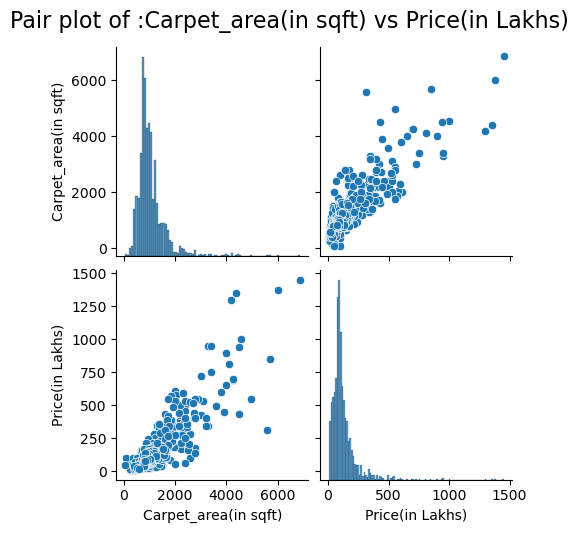

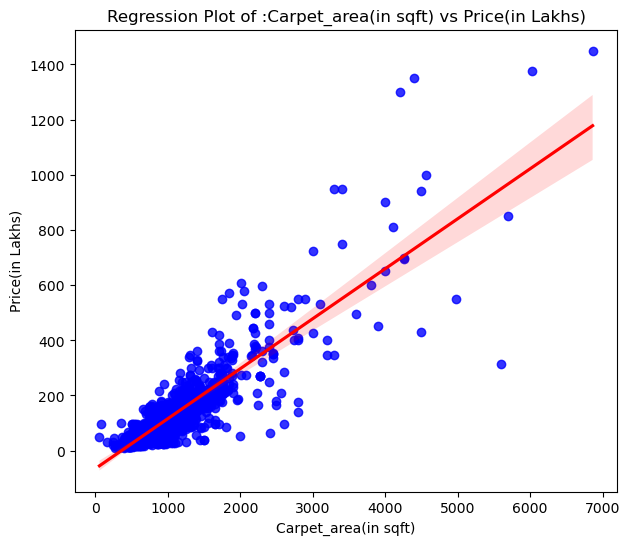

In [232]:
numerical_vs_numerical(flat_data,'Carpet_area(in sqft)','Price(in Lakhs)')

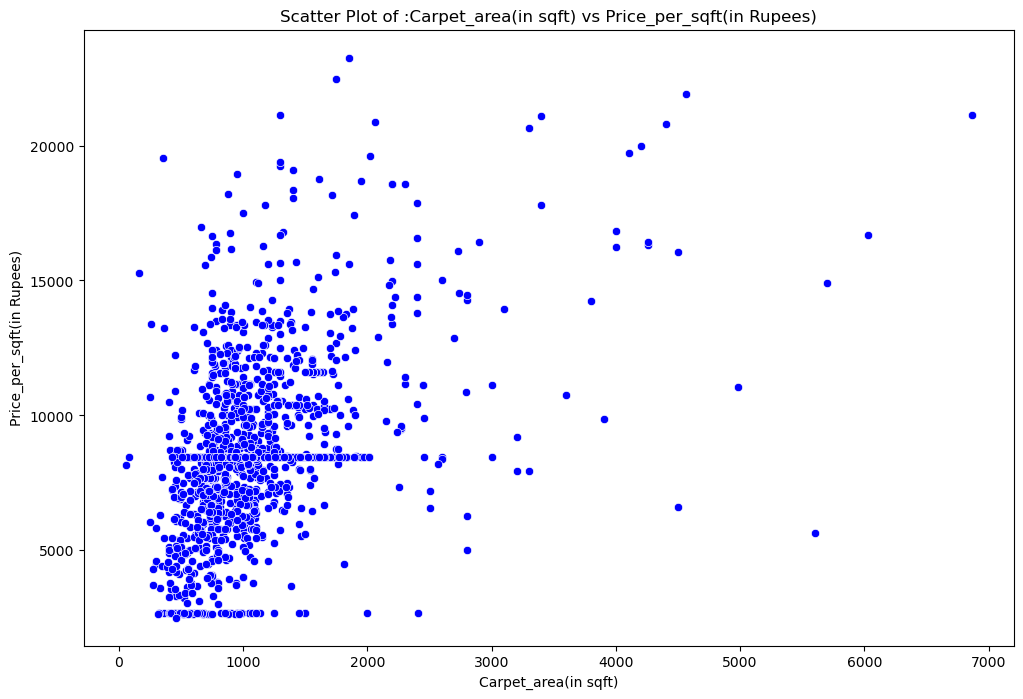

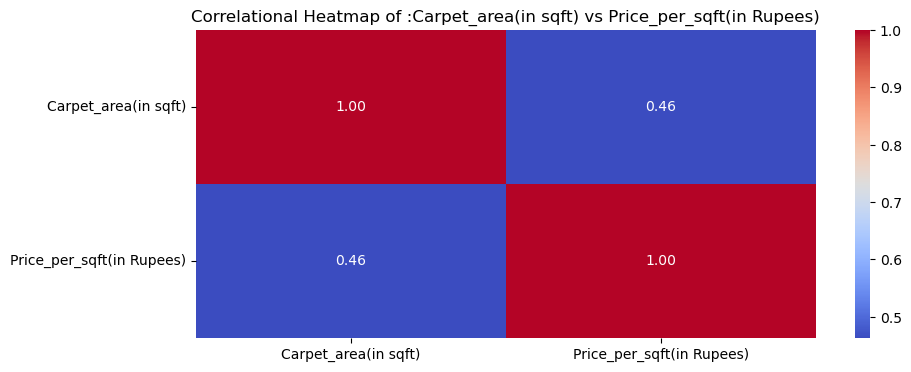

<Figure size 1200x800 with 0 Axes>

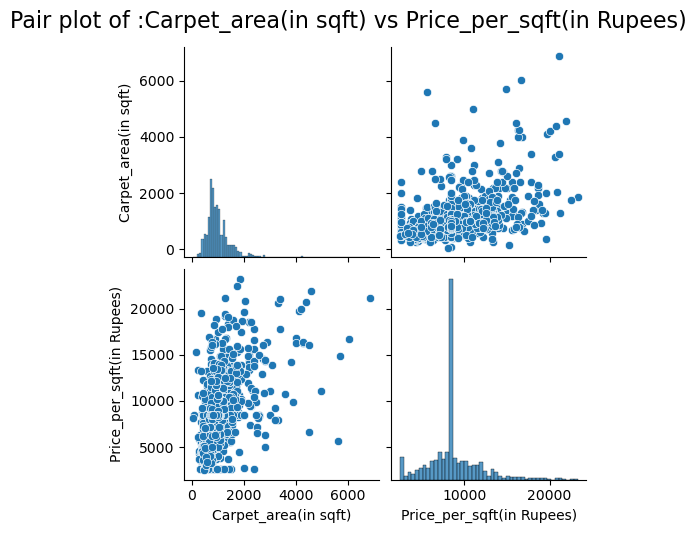

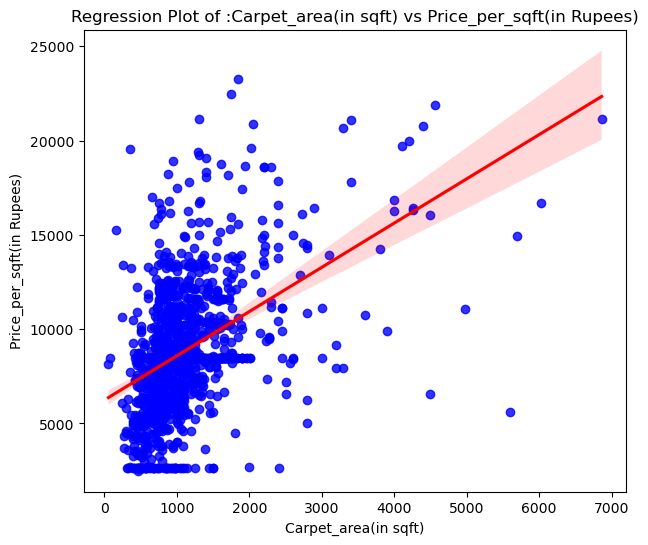

In [234]:
numerical_vs_numerical(flat_data,'Carpet_area(in sqft)','Price_per_sqft(in Rupees)')

# Observation : 
The scatter plot reveals a clear positive and roughly linear relationship between carpet area and property price, indicating that larger properties generally command higher prices. However, the noticeable scatter of data points around the regression line suggests that carpet area alone is not a perfect predictor of price, with other factors likely playing a role.

# Making a function for categorical vs categorical columns 

In [293]:
def cat_vs_cat(dataset, column1, column2):
    plt.figure(figsize=(8,6))
    sns.countplot(x=dataset[column1], hue=dataset[column2])
    plt.legend(title=column2, bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.xticks(rotation=30)
    plt.title(f'Bar plot of {column1} grouped by {column2}')
    plt.show()
    crosstab_result = pd.crosstab(dataset[column1], dataset[column2], normalize='index') * 100
    return crosstab_result

In [288]:
categorical_col 

['Flat_type',
 'Locality',
 'City',
 'Project_name',
 'Present_status',
 'Floor_number',
 'Total_floors',
 'Furnishing',
 'No_of_bathrooms']

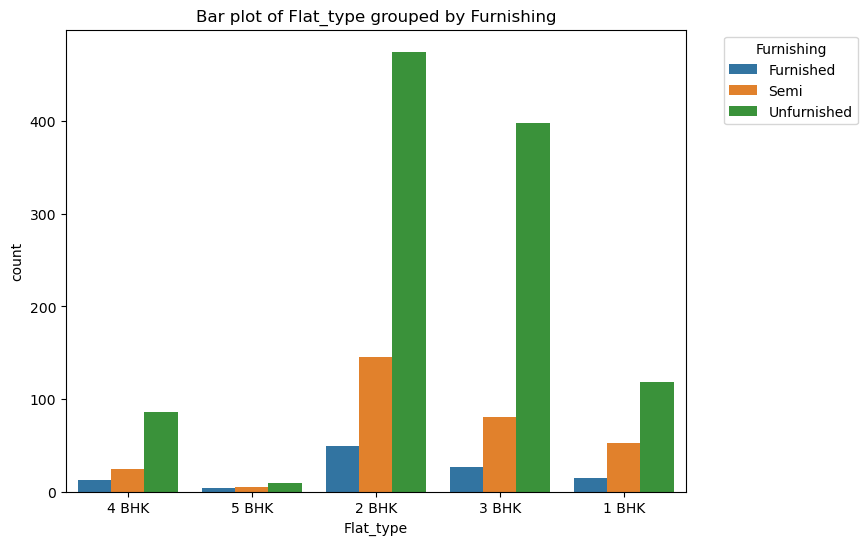

Furnishing  Furnished       Semi  Unfurnished
Flat_type                                    
1 BHK        8.108108  28.108108    63.783784
2 BHK        7.324365  21.674141    71.001495
3 BHK        5.346535  15.841584    78.811881
4 BHK       10.569106  19.512195    69.918699
5 BHK       22.222222  27.777778    50.000000

In [294]:
cat_vs_cat(flat_data,'Flat_type','Furnishing')

# Observation : 
Unfurnished flats show a clear trend of having a higher percentage of larger unit configurations (3 BHK and 4 BHK) compared to furnished and semi-furnished options, while furnished and semi-furnished flats have a greater proportion of smaller units (1 BHK and 2 BHK)

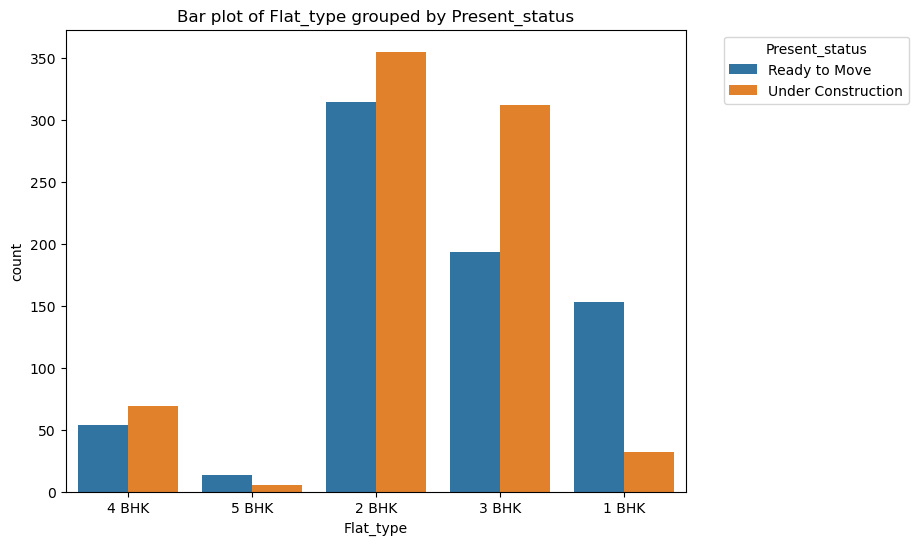

Present_status  Ready to Move  Under Construction
Flat_type                                        
1 BHK               82.702703           17.297297
2 BHK               46.935725           53.064275
3 BHK               38.217822           61.782178
4 BHK               43.902439           56.097561
5 BHK               72.222222           27.777778

In [295]:
cat_vs_cat(flat_data,'Flat_type','Present_status')

# Observation : 
A higher percentage of smaller unit configurations (1 BHK and 2 BHK) are 'Ready to Move' compared to 'Under Construction', while larger unit configurations (3 BHK, 4 BHK, and 5 BHK) tend to have a greater proportion of properties that are currently 'Under Construction'

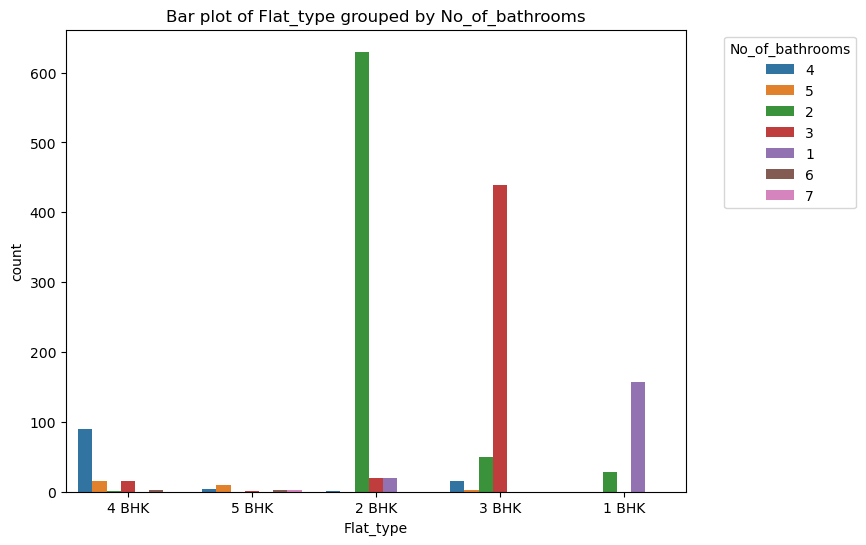

No_of_bathrooms          1          2          3          4          5  \
Flat_type                                                                
1 BHK            84.864865  15.135135   0.000000   0.000000   0.000000   
2 BHK             2.840060  94.170404   2.840060   0.149477   0.000000   
3 BHK             0.000000   9.702970  86.930693   2.970297   0.396040   
4 BHK             0.000000   0.813008  12.195122  73.170732  12.195122   
5 BHK             0.000000   0.000000   5.555556  22.222222  50.000000   

No_of_bathrooms          6          7  
Flat_type                              
1 BHK             0.000000   0.000000  
2 BHK             0.000000   0.000000  
3 BHK             0.000000   0.000000  
4 BHK             1.626016   0.000000  
5 BHK            11.111111  11.111111

In [296]:
cat_vs_cat(flat_data,'Flat_type','No_of_bathrooms')

# Observation : 
Smaller unit configurations (1 BHK and 2 BHK) predominantly have fewer bathrooms, with 1 BHK almost exclusively having one bathroom and 2 BHK mostly having two. As the number of bedrooms increases (3 BHK and above), there's a clear trend towards a higher number of bathrooms being more common, with larger flats often having three or more bathrooms

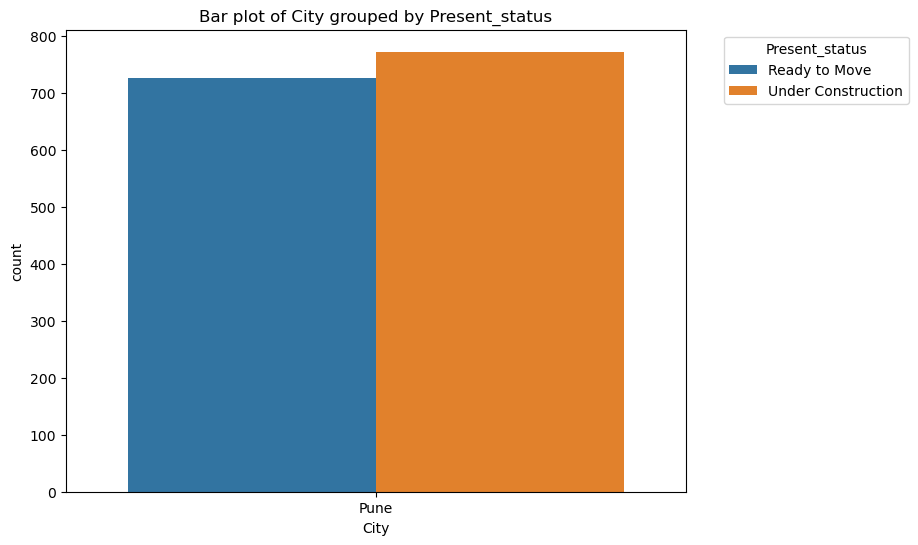

Present_status  Ready to Move  Under Construction
City                                             
Pune                48.466667           51.533333

In [297]:
cat_vs_cat(flat_data,'City','Present_status')

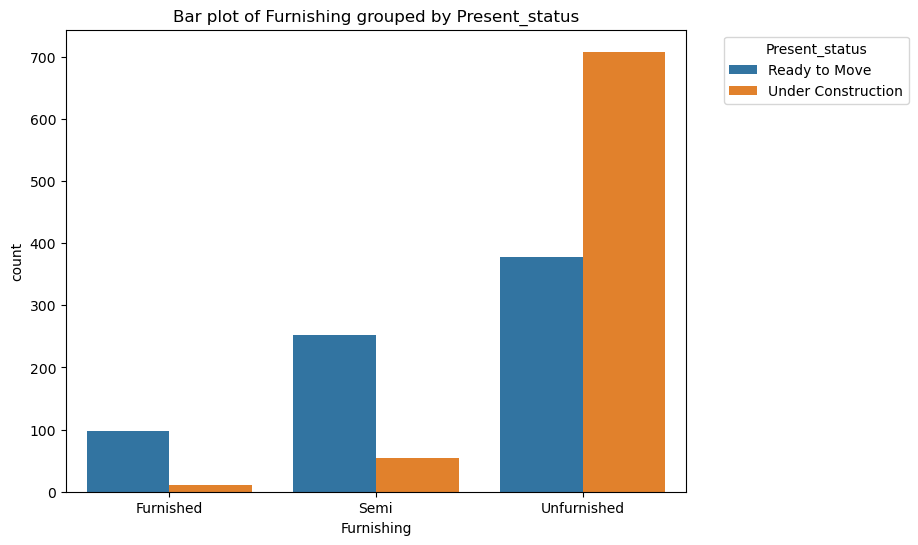

Present_status  Ready to Move  Under Construction
Furnishing                                       
Furnished           89.814815           10.185185
Semi                82.352941           17.647059
Unfurnished         34.806630           65.193370

In [300]:
cat_vs_cat(flat_data,'Furnishing','Present_status')

# Observation : 
A significantly higher percentage of furnished and semi-furnished properties are 'Ready to Move' compared to 'Under Construction'. In contrast, unfurnished properties show the opposite trend, with a much larger proportion being 'Under Construction' than 'Ready to Move'.

In [1]:
def cat_vs_cat_top10(dataset, column1, column2):
    top_10_values = dataset[column1].value_counts().nlargest(10).index.tolist()
    
    filtered_data = dataset[dataset[column1].isin(top_10_values)]
    
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=filtered_data[column1], hue=filtered_data[column2])
    
    plt.legend(title=column2, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xticks(rotation=60)
    plt.title(f'Top 10 {column1} grouped by {column2}')
    plt.show()
    
    crosstab_result = pd.crosstab(filtered_data[column1], filtered_data[column2], normalize='index') * 100
    return crosstab_result

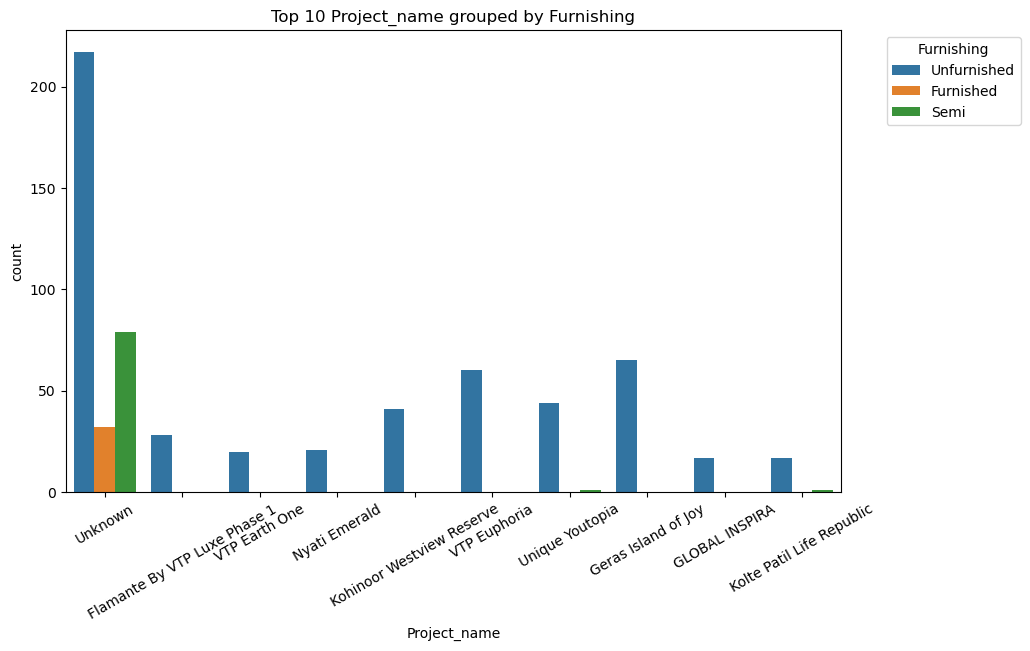

Furnishing                    Furnished       Semi  Unfurnished
Project_name                                                   
Flamante By VTP Luxe Phase 1   0.000000   0.000000   100.000000
GLOBAL INSPIRA                 0.000000   0.000000   100.000000
Geras Island of Joy            0.000000   0.000000   100.000000
Kohinoor Westview Reserve      0.000000   0.000000   100.000000
Kolte Patil Life Republic      0.000000   5.555556    94.444444
Nyati Emerald                  0.000000   0.000000   100.000000
Unique Youtopia                0.000000   2.222222    97.777778
Unknown                        9.756098  24.085366    66.158537
VTP Earth One                  0.000000   0.000000   100.000000
VTP Euphoria                   0.000000   0.000000   100.000000

In [309]:
cat_vs_cat_top10(flat_data,'Project_name','Furnishing')

# Observation : 
Most of the top ten projects listed in Pune predominantly offer unfurnished properties. Only the 'Unknown' project shows a mix of furnishing options

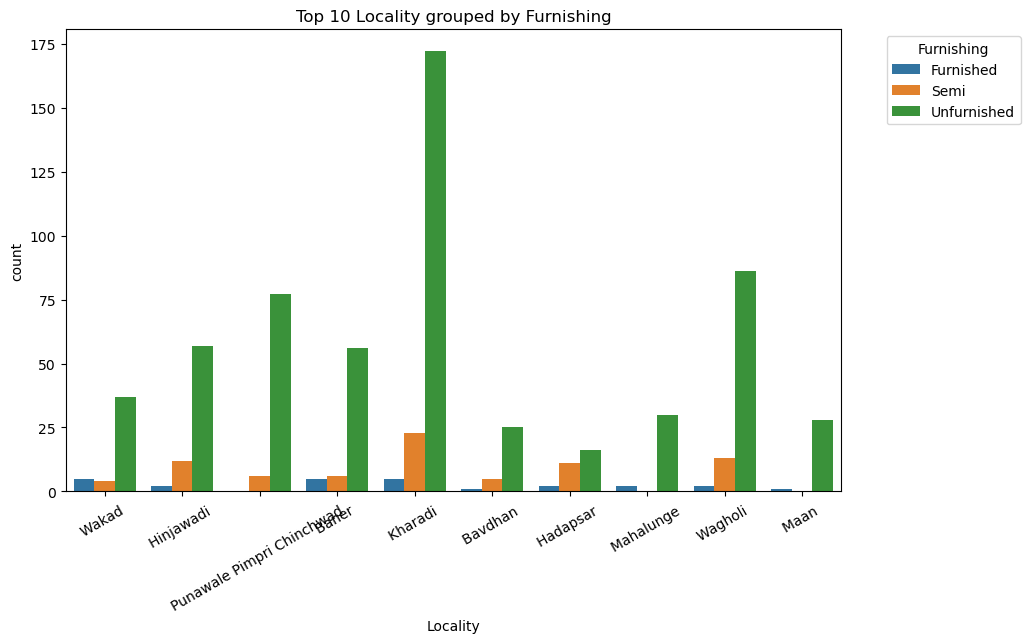

Furnishing                  Furnished       Semi  Unfurnished
Locality                                                     
Baner                        7.462687   8.955224    83.582090
Bavdhan                      3.225806  16.129032    80.645161
Hadapsar                     6.896552  37.931034    55.172414
Hinjawadi                    2.816901  16.901408    80.281690
Kharadi                      2.500000  11.500000    86.000000
Maan                         3.448276   0.000000    96.551724
Mahalunge                    6.250000   0.000000    93.750000
Punawale Pimpri Chinchwad    0.000000   7.228916    92.771084
Wagholi                      1.980198  12.871287    85.148515
Wakad                       10.869565   8.695652    80.434783

In [310]:
cat_vs_cat_top10(flat_data,'Locality','Furnishing')

# Observation : 
Across the top ten localities in Pune, unfurnished properties consistently represent the highest percentage of available options. Some localities like Maan and Mahalunge show an even stronger concentration of unfurnished units, while Hadapsar has a relatively higher proportion of semi-furnished properties compared to the others. Furnished options generally constitute the smallest share across these popular areas

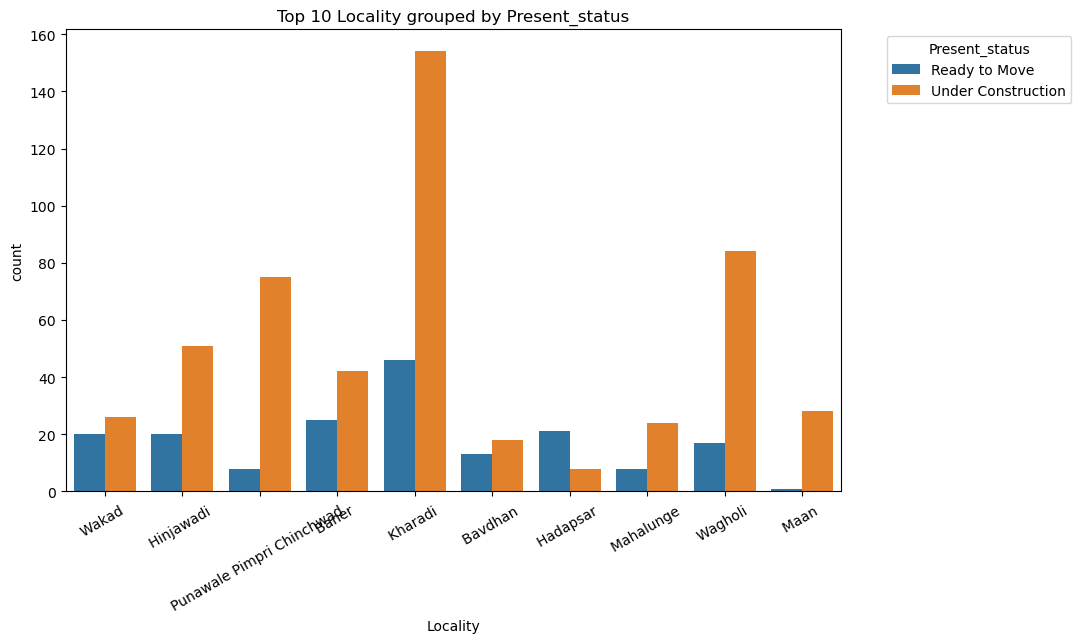

Present_status              Ready to Move  Under Construction
Locality                                                     
Baner                           37.313433           62.686567
Bavdhan                         41.935484           58.064516
Hadapsar                        72.413793           27.586207
Hinjawadi                       28.169014           71.830986
Kharadi                         23.000000           77.000000
Maan                             3.448276           96.551724
Mahalunge                       25.000000           75.000000
Punawale Pimpri Chinchwad        9.638554           90.361446
Wagholi                         16.831683           83.168317
Wakad                           43.478261           56.521739

In [312]:
cat_vs_cat_top10(flat_data,'Locality','Present_status')

# Observation : 
Observing the 'Present_status' across the top ten localities in Pune, Hadapsar stands out with a significantly higher percentage of 'Ready to Move' properties. In contrast, localities like Maan and Punawale Pimpri Chinchwad show a very high concentration of 'Under Construction' properties. The remaining top localities generally have a larger proportion of properties that are currently 'Under Construction' compared to those that are 'Ready to Move

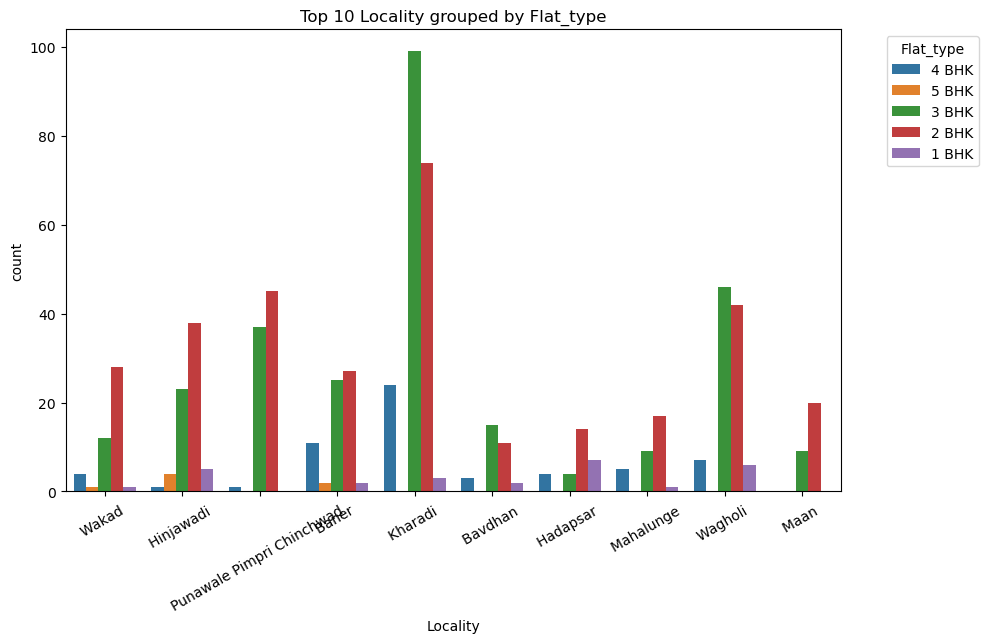

Flat_type                       1 BHK      2 BHK      3 BHK      4 BHK  \
Locality                                                                 
Baner                        2.985075  40.298507  37.313433  16.417910   
Bavdhan                      6.451613  35.483871  48.387097   9.677419   
Hadapsar                    24.137931  48.275862  13.793103  13.793103   
Hinjawadi                    7.042254  53.521127  32.394366   1.408451   
Kharadi                      1.500000  37.000000  49.500000  12.000000   
Maan                         0.000000  68.965517  31.034483   0.000000   
Mahalunge                    3.125000  53.125000  28.125000  15.625000   
Punawale Pimpri Chinchwad    0.000000  54.216867  44.578313   1.204819   
Wagholi                      5.940594  41.584158  45.544554   6.930693   
Wakad                        2.173913  60.869565  26.086957   8.695652   

Flat_type                      5 BHK  
Locality                              
Baner                       2.985075  
Bavdhan                     0.000000  
Hadapsar                    0.000000  
Hinjawadi                   5.633803  
Kharadi                     0.000000  
Maan                        0.000000  
Mahalunge                   0.000000  
Punawale Pimpri Chinchwad   0.000000  
Wagholi                     0.000000  
Wakad                       2.173913

In [314]:
cat_vs_cat_top10(flat_data,'Locality','Flat_type')

# Observation : 
Across the top ten localities in Pune, 2 BHK and 3 BHK configurations are the most prevalent flat types. Notably, some localities like Maan and Punawale Pimpri Chinchwad show a particularly high concentration of 2 BHK and 3 BHK options, with minimal or no availability of 1 BHK, 4 BHK, or 5 BHK units. In contrast, Baner and Hinjawadi exhibit a more diverse mix of flat types, including some presence of 1 BHK, 4 BHK, and even 5 BHK configurations.

# Multivariate Analysis

In [315]:
def mul_pair_plot(data,numerical_columns):
    sns.pairplot(data[numerical_columns])
    plt.suptitle('Pair plot of numerical columns',fontsize=16 ,y=1.0)
    plt.show()

In [316]:
def mul_corr_heatmap(data,numerical_columns):
     corr_data = data[numerical_columns].corr()
     plt.figure(figsize=(10,6))
     sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt='.2f')
     plt.title("Correlation Heatmap of Numerical Columns")
     plt.xticks(rotation=20)
     plt.show()

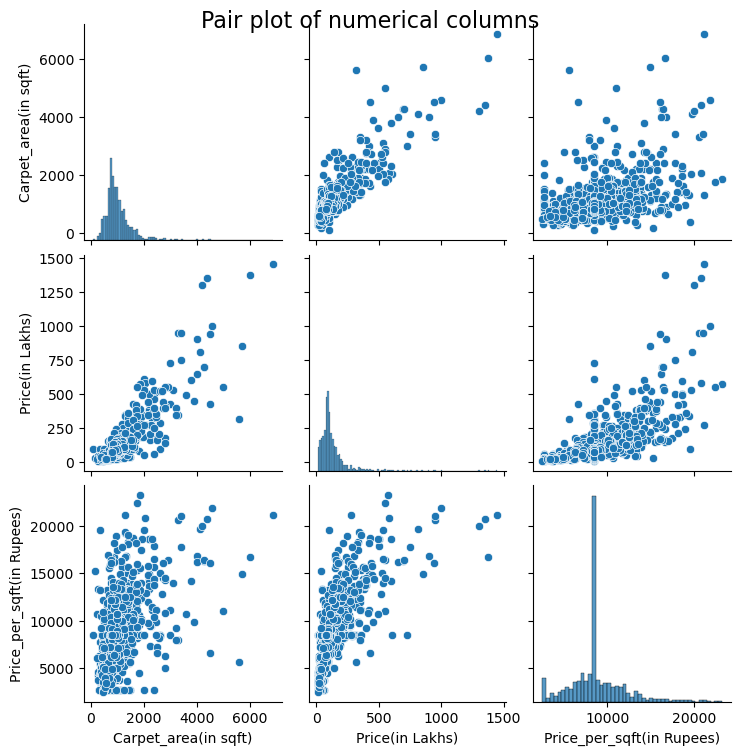

In [317]:
mul_pair_plot(flat_data,numerical_col)

# Observation : 
larger properties generally cost more, and there's a relationship between size and price per square foot, but price is most directly related to price per square foot

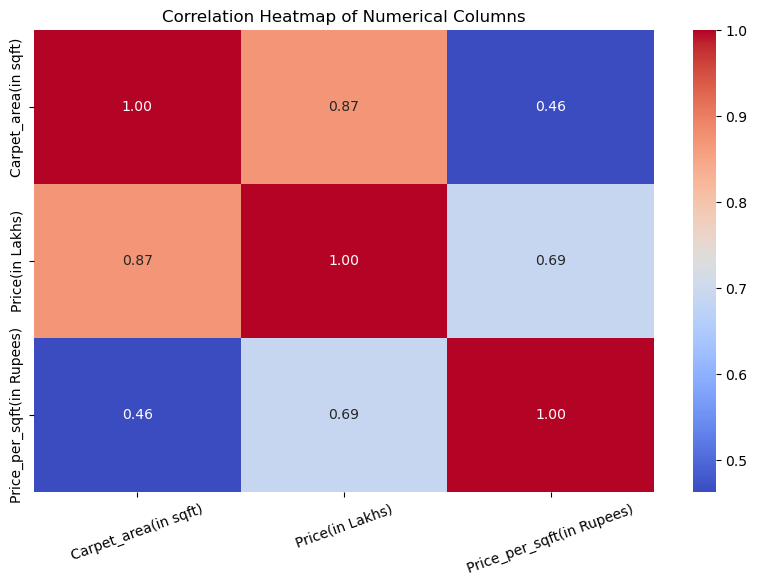

In [318]:
mul_corr_heatmap(flat_data,numerical_col)

# Observation : 
property size is a strong driver of overall price, while price per square foot also contributes to the total price, and there's a less pronounced tendency for larger properties to have a slightly higher price per square foot.

# Overall observation : 
- Price and Size: Bigger flats cost more.
- Furnishing Impact: Semi-furnished might have slightly higher rates; unfurnished varies most.
- Construction Stage: Smaller flats are often ready; larger ones are usually under construction.
- Bathrooms and Size: More bedrooms mean more bathrooms.
- Unfurnished Trend: New and popular projects/areas favor unfurnished options.
- Hadapsar - Ready Focus: More ready-to-move properties in Hadapsar.
- Popular Sizes: 2 and 3 BHK flats are most common.
- Price Factors: Size strongly influences price; rate per sqft also matters.
- Baner is the most premium location with high prices of flat top 5 localities are baner , bavdhan , Hinjawadi,Hadapsar ,kharadi. 